#1.DATA EXPORTATION

1.1 Data exportation - SERIE A DEFENDERS

In [1]:
import requests
import pandas as pd
import time
import numpy as np

# API key - Replace with your actual API key
api_key = 'ba53d657e0973b0ae6f5a6b0be2f88d1'

# Request headers
headers = {
    'x-apisports-key': api_key
}

# Serie A ID and season
league_id = 135  # Serie A ID
season = 2023
page = 1
all_players = []

print("Starting API data collection for Serie A Defenders (2023/2024 season)...")

# Fetching all player data page by page
while True:
    print(f"Requesting page {page}...")
    params = {
        'league': league_id,
        'season': season,
        'page': page
    }
    response = requests.get('https://v3.football.api-sports.io/players', headers=headers, params=params)
    data = response.json()

    if data['errors']:
        print(f"❌ API Error on page {page}: {data['errors']}")
        break
    if not data['response']:
        break

    for player_entry in data['response']:
        player_info = player_entry['player']
        stats = player_entry['statistics'][0]

        merged_stats = {
            'name': player_info['name'],
            'team': stats['team']['name'],
            'position': stats['games']['position'],
            'minutes': stats['games']['minutes'],
            'duels_total': stats.get('duels', {}).get('total', 0),
            'duels_won': stats.get('duels', {}).get('won', 0),
            'goals': stats.get('goals', {}).get('total', 0),
            'shots_total': stats.get('shots', {}).get('total', 0),
            'shots_on_target': stats.get('shots', {}).get('on_target', 0),
            'assists': stats.get('goals', {}).get('assists', 0),
            'dribbles_attempts': stats.get('dribbles', {}).get('attempts', 0),
            'dribbles_success': stats.get('dribbles', {}).get('success', 0),
            'touches_total': stats.get('touches', {}).get('total', 0),
            'passes_key': stats.get('passes', {}).get('key', 0),
            'passes_total': stats.get('passes', {}).get('total', 0),
            'passes_accuracy': stats.get('passes', {}).get('accuracy', 0),
            'tackles': stats.get('tackles', {}).get('total', 0),
            'interceptions': stats.get('tackles', {}).get('interceptions', 0),
        }
        all_players.append(merged_stats)
    page += 1
    time.sleep(1)

df = pd.DataFrame(all_players)

# Filter for defenders with ≥540 minutes
defenders_df = df[(df['position'] == 'Defender') & (df['minutes'] >= 540)].copy()

# Derived metrics
defenders_df['shots_on_target_perc'] = np.where(
    defenders_df['shots_total'].fillna(0) != 0,
    (defenders_df['shots_on_target'].fillna(0) / defenders_df['shots_total'].fillna(0)) * 100,
    0.0
)

defenders_df['dribbles_success_perc'] = np.where(
    defenders_df['dribbles_attempts'].fillna(0) != 0,
    (defenders_df['dribbles_success'].fillna(0) / defenders_df['dribbles_attempts'].fillna(0)) * 100,
    0.0
)

# Save CSV
output_filename = "seriea_defenders_2023_24_api_stats.csv"
defenders_df.to_csv(output_filename, index=False)
print(f"\n✅ Serie A Defenders API stats (filtered for >=540 mins) saved to: {output_filename}")

# Preview
print("\nFirst 5 rows of the exported Serie A Defenders API stats:")
print(defenders_df.head().to_string())
print(f"\nShape of the exported Serie A Defenders API stats: {defenders_df.shape}")


Starting API data collection for Serie A Defenders (2023/2024 season)...
Requesting page 1...
Requesting page 2...
Requesting page 3...
Requesting page 4...
Requesting page 5...
Requesting page 6...
Requesting page 7...
Requesting page 8...
Requesting page 9...
Requesting page 10...
Requesting page 11...
Requesting page 12...
Requesting page 13...
Requesting page 14...
Requesting page 15...
Requesting page 16...
Requesting page 17...
Requesting page 18...
Requesting page 19...
Requesting page 20...
Requesting page 21...
Requesting page 22...
Requesting page 23...
Requesting page 24...
Requesting page 25...
Requesting page 26...
Requesting page 27...
Requesting page 28...
Requesting page 29...
Requesting page 30...
Requesting page 31...
Requesting page 32...
Requesting page 33...
Requesting page 34...
Requesting page 35...
Requesting page 36...
Requesting page 37...
Requesting page 38...
Requesting page 39...
Requesting page 40...
Requesting page 41...
Requesting page 42...
Requesting p

In [2]:
import pandas as pd

# Load the API-exported defenders stats.
# This file is expected to already contain only defenders with >= 540 minutes.
try:
    df_api_defenders = pd.read_csv("seriea_defenders_2023_24_api_stats.csv")
    print("✅ Serie A Defenders API stats loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_api_stats.csv' not found.")
    print("Please ensure this file has been generated by the 'Serie A Defenders API Data Export' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Filter for 'Defender' position and players with 540 minutes or more.
defenders_filtered = df_api_defenders[
    (df_api_defenders['position'] == 'Defender') &
    (df_api_defenders['minutes'] >= 540)
].copy()

# Show how many defenders meet the criteria
print(f"\n✅ Serie A Defenders with 540 minutes or more found (re-confirmed): {len(defenders_filtered)}")

# Show available columns
print("\nAvailable columns for filtered Serie A defenders:")
print(defenders_filtered.columns.tolist())

# Save the filtered DataFrame to CSV
output_filename = "seriea_defenders_2023_24_filtered.csv"
defenders_filtered.to_csv(output_filename, index=False)
print(f"\n✅ Filtered Serie A defenders dataset saved as: {output_filename}")

# Preview filtered dataset
print("\nFirst 5 rows of the filtered Serie A defenders dataset:")
print(defenders_filtered.head().to_string())


✅ Serie A Defenders API stats loaded successfully.

✅ Serie A Defenders with 540 minutes or more found (re-confirmed): 140

Available columns for filtered Serie A defenders:
['name', 'team', 'position', 'minutes', 'duels_total', 'duels_won', 'goals', 'shots_total', 'shots_on_target', 'assists', 'dribbles_attempts', 'dribbles_success', 'touches_total', 'passes_key', 'passes_total', 'passes_accuracy', 'tackles', 'interceptions', 'shots_on_target_perc', 'dribbles_success_perc']

✅ Filtered Serie A defenders dataset saved as: seriea_defenders_2023_24_filtered.csv

First 5 rows of the filtered Serie A defenders dataset:
             name         team  position  minutes  duels_total  duels_won  goals  shots_total  shots_on_target  assists  dribbles_attempts  dribbles_success  touches_total  passes_key  passes_total  passes_accuracy  tackles  interceptions  shots_on_target_perc  dribbles_success_perc
0        F. Fazio  Salernitana  Defender   1355.0        117.0       79.0    1.0          6.0

I am enhancing the SERIE A 2023/24 defenders dataset by adding accurate passing accuracy values and defensive actions from FBref as they were missing from the previous dataset(API).

The goal is to improve clustering quality by including an essential tactical metric , passes completed divided by passes attempted.

To make this work, I must:

    Load the 3 datasets (the API data and FBref passing data and defensive actions)

    Ensure player and team names are aligned

    Merge them carefully

    Update our dataset with the accurate passes_accuracy values

    Save the cleaned and enriched version for clustering

In [3]:
%pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import unidecode

# Step 1: Load Datasets
try:
    api_df = pd.read_csv("seriea_defenders_2023_24_api_stats.csv")
    passing_df = pd.read_csv("Serie_A_players_passing.csv", encoding='ISO-8859-1', sep=None, engine='python')
    defensive_df = pd.read_csv("Serie_A_defensive_actions.csv", encoding='ISO-8859-1', sep=None, engine='python')
    print("✅ All Serie A defender datasets loaded successfully.")
except Exception as e:
    print(f"❌ Error loading files: {e}")
    exit()

# Step 2: Normalize Apostrophes
api_df['name'] = api_df['name'].str.replace('&apos;', "'", regex=False)
passing_df['Player'] = passing_df['Player'].str.replace('&apos;', "'", regex=False)
defensive_df['Player'] = defensive_df['Player'].str.replace('&apos;', "'", regex=False)

# Step 3: Clean Player & Team Names
def clean_text(text):
    return unidecode.unidecode(str(text)).lower().strip()

api_df['name_clean'] = api_df['name'].apply(clean_text)
api_df['team_clean'] = api_df['team'].apply(clean_text)

passing_df['name_clean'] = passing_df['Player'].apply(clean_text)
passing_df['team_clean'] = passing_df['Squad'].apply(clean_text)

defensive_df['name_clean'] = defensive_df['Player'].apply(clean_text)
defensive_df['team_clean'] = defensive_df['Squad'].apply(clean_text)

# Step 4: Standardize Serie A Team Names
team_name_map = {
    'ac milan': 'milan',
    'inter milan': 'inter',
    'as roma': 'roma',
    'us lecce': 'lecce',
    'ssc napoli': 'napoli',
    'atalanta bc': 'atalanta',
    'juventus': 'juventus',
    'ss lazio': 'lazio',
    'torino fc': 'torino',
    'hellas verona': 'verona',
    'fiorentina': 'fiorentina',
    'bologna fc': 'bologna',
    'empoli fc': 'empoli',
    'cagliari calcio': 'cagliari',
    'monza': 'monza',
    'udinese': 'udinese',
    'sassuolo': 'sassuolo',
    'salernitana': 'salernitana',
    'genoa': 'genoa',
    'frosinone': 'frosinone',
}

api_df['team_clean'] = api_df['team_clean'].replace(team_name_map)
passing_df['team_clean'] = passing_df['team_clean'].replace(team_name_map)
defensive_df['team_clean'] = defensive_df['team_clean'].replace(team_name_map)

# Step 5: Remove FBref Aggregate Rows
passing_df = passing_df[passing_df['team_clean'] != 'squad'].copy()
defensive_df = defensive_df[defensive_df['team_clean'] != 'squad'].copy()

# Step 6: Manual Name Mapping

manual_name_map = {
    'f. fazio': 'federico fazio',
    's. kjaer': 'simon kjaer',
    'k. djidji': 'koffi djidji',
    'p. hatzidiakos': 'pantelis hatzidiakos',
    'd. d\'ambrosio': 'danilo d\'ambrosio',
    'a. florenzi': 'alessandro florenzi',
    'd. calabria': 'davide calabria',
    'r. toloi': 'rafael toloi',
    'r. karsdorp': 'rick karsdorp',
    'd. rugani': 'daniele rugani',
    'm. pedersen': 'marcus pedersen',
    'm. vojvoda': 'mergim vojvoda',
    'f. centonze': 'fabien centonze',
    'e. goldaniga': 'edoardo goldaniga',
    'a. dossena': 'alberto dossena',
    'e. valeri': 'emanuele valeri',
    'j. tchatchoua': 'jackson tchatchoua',
    'p. schuurs': 'perr schuurs',
    'a. ismajli': 'ardian ismajli',
    'a. masina': 'adam masina',
    's. walukiewicz': 'sebastian walukiewicz',
    'y. mina': 'yerry mina',
    'c. biraghi': 'cristiano biraghi',
    'm. wieteska': 'mateusz wieteska',
    'n. zortea': 'nadir zortea',
    'g. zappa': 'gabriele zappa',
    'a. obert': 'adam obert',
    'e. hysaj': 'elseid hysaj',
    'a. marusic': 'adam marusic',
    's. kolasinac': 'sead kolasinac',
    'b. djimsiti': 'berat djimsiti',
    'r. bellanova': 'raoul bellanova',
    'i. hien': 'isak hien',
    'g. scalvini': 'giorgio scalvini',
    'f. parisi': 'fabiano parisi',
    'm. viti': 'mattia viti',
    'j. cabal': 'juan david cabal',
    'a. cambiaso': 'andrea cambiaso',
    'f. gatti': 'federico gatti',
    's. de vrij': 'stefan de vrij',
    'd. dumfries': 'denzel dumfries',
    'm. darmian': 'matteo darmian',
    'f. dimarco': 'federico dimarco',
    'z. celik': 'zeki celik',
    'j. doig': 'josh doig',
    'j. toljan': 'jeremy toljan',
    'l. gianetti': 'lautaro gianetti',
    'j. zemura': 'jordan zemura',
    'h. kamara': 'hassane kamara',
    'k. ehizibue': 'kingsley ehizibue',
    't. kristensen': 'thomas kristensen',
    'l. spinazzola': 'leonardo spinazzola',
    'a. buongiorno': 'alessandro buongiorno',
    'm. olivera': 'mathias olivera',
    'a. zanoli': 'alessandro zanoli',
    'm. bani': 'mattia bani',
    's. sabelli': 'stefano sabelli',
    'a. vogliacco': 'alessandro vogliacco',
    'j. vasquez': 'johan vasquez',
    'l. de silvestri': 'lorenzo de silvestri',
    'c. lykogiannis': 'charalampos lykogiannis',
    'm. erlic': 'martin erlic',
    'a. gallo': 'antonino gallo',
    'v. gendrey': 'valentin gendrey',
    'r. kristensen': 'rasmus kristensen',
    'r. rodriguez': 'ricardo rodriguez',
    'n. milenkovic': 'nikola milenkovic',
    'd. spence': 'djed spence',
    'r. dragusin': 'radu dragusin',
    'm. kayode': 'michael kayode',
    'd. coppola': 'diego coppola',
    'p. dorgu': 'patrick dorgu',
    'n. gyomber': 'norbert gyomber',
    'f. ebosele': 'festy ebosele',
    'n. perez': 'nehuen perez',
    'ruan tressoldi': 'ruan',
    'b. bereszynski': 'bartosz bereszynski',
    'd. bradaric': 'domagoj bradaric',
    'j. sambia': 'junior sambia',
    'g. ferrari': 'gian marco ferrari',
    'f. daniliuc': 'flavius daniliuc',
    'i. monterisi': 'ilario monterisi',
    'a. oyono': 'anthony oyono',
    'g. magnani': 'giangiacomo magnani',
    'n. pierozzi': 'niccolo pierozzi',
    'c. okoli': 'caleb okoli',
    'b. amione': 'bruno amione',
    'l. pirola': 'lorenzo pirola',
    'v. kristiansen': 'victor bernth kristiansen',
}

api_df['name_clean'] = api_df['name_clean'].replace(manual_name_map)

# Step 7: Merge with FBref Passing Data
merged_df = pd.merge(api_df, passing_df, on=['name_clean', 'team_clean'], how='left', suffixes=('', '_fbref_pass'))
merged_df['passes_accuracy'] = merged_df['Cmp%'].fillna(merged_df['passes_accuracy'])

# Step 8: Merge with FBref Defensive Data
merged_final = pd.merge(merged_df, defensive_df, on=['name_clean', 'team_clean'], how='left', suffixes=('', '_fbref_def'))

# Step 9: Drop Redundant Columns
cols_to_drop = ['Player_fbref_pass', 'Squad_fbref_pass', 'Cmp%', 'Player_fbref_def', 'Squad_fbref_def']
merged_final.drop(columns=[c for c in cols_to_drop if c in merged_final.columns], inplace=True)

# Step 10: Save Final Dataset
merged_final.to_csv("seriea_defenders_2023_24_combined.csv", index=False)
print("✅ Final merged and cleaned Serie A defenders dataset saved.")


✅ All Serie A defender datasets loaded successfully.
✅ Final merged and cleaned Serie A defenders dataset saved.


I am inspecting missing values.

In [5]:
import pandas as pd

# Load the combined dataset for Serie A defenders
try:
    df_combined = pd.read_csv("seriea_defenders_2023_24_combined.csv")
    print("✅ Combined Serie A defenders dataset loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_combined.csv' not found. Please ensure the file exists.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Display columns and shape of the dataset
print("\nColumns in the combined Serie A defenders dataset:")
print(df_combined.columns.tolist())
print("\nShape of the combined Serie A defenders dataset:", df_combined.shape)

# Display the first few rows
print("\nFirst 5 rows of the combined Serie A defenders dataset:")
print(df_combined.head().to_string())

# Check for missing values in each column
missing_values = df_combined.isnull().sum()
missing_percentages = (missing_values / len(df_combined)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentages
})

# Display columns with missing values, sorted by the number of missing values
print("\nMissing values summary for Serie A defenders (columns with missing values only):")
print(missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False).to_string())


✅ Combined Serie A defenders dataset loaded successfully.

Columns in the combined Serie A defenders dataset:
['name', 'team', 'position', 'minutes', 'duels_total', 'duels_won', 'goals', 'shots_total', 'shots_on_target', 'assists', 'dribbles_attempts', 'dribbles_success', 'touches_total', 'passes_key', 'passes_total', 'passes_accuracy', 'tackles', 'interceptions', 'shots_on_target_perc', 'dribbles_success_perc', 'name_clean', 'team_clean', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Cmp', 'Att', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1-???', 'PPA', 'CrsPA', 'PrgP', 'Matches', 'Rk_fbref_def', 'Nation_fbref_def', 'Pos_fbref_def', 'Age_fbref_def', 'Born_fbref_def', '90s_fbref_def', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att_fbref_def', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Matches_fbref_def']

Shape of the combine

I am dropping the columns that I do not need.

In [6]:
import pandas as pd

# === Load the combined Serie A defenders dataset ===
try:
    df_combined = pd.read_csv("seriea_defenders_2023_24_combined.csv")
    print("✅ Combined Serie A defenders dataset loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_combined.csv' not found. Please ensure the file exists.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# === Filter players with >= 540 minutes played ===
initial_player_count = len(df_combined)
df_combined = df_combined[df_combined['minutes'] >= 540].copy()
print(f"✅ Filtered for players with >= 540 minutes. Reduced from {initial_player_count} to {len(df_combined)} players.")

# === Drop columns with high missing values or low relevance ===
columns_to_drop_high_missing = [
    'passes_key', 'shots', 'assists',
    'Pos', 'Att', 'TotDist', 'PrgDist',
    'xAG', 'xA', 'A-xAG', 'KP', '1-???', 'PPA', 'CrsPA', 'PrgP',
    'Matches', 'Rk', 'Unnamed: 0', 'Born',
    'Pos_fbref_pass', 'Pos_fbref_def',
    'Att_fbref_pass', 'Att_fbref_def',
    'Matches_fbref_pass', 'Matches_fbref_def',
    'Rk_fbref_pass', 'Rk_fbref_def',
    'Age', 'Squad'
]

df_filtered_high_missing_dropped = df_combined.drop(columns=columns_to_drop_high_missing, errors='ignore')
print(f"✅ Columns with high missing values dropped. New shape: {df_filtered_high_missing_dropped.shape}")

# === Drop rows that still contain any remaining missing values ===
remaining_missing_after_drop = df_filtered_high_missing_dropped.isnull().sum()
columns_with_remaining_missing_after_drop = remaining_missing_after_drop[remaining_missing_after_drop > 0].index.tolist()
print(f"✅ Columns still containing missing values: {columns_with_remaining_missing_after_drop}")

df_cleaned_for_clustering = df_filtered_high_missing_dropped.dropna(subset=columns_with_remaining_missing_after_drop).copy()

# === Final dataset preview ===
print(f"\nOriginal number of players in combined dataset (before 540 min filter): {initial_player_count}")
print(f"Number of players remaining after filtering and cleaning: {len(df_cleaned_for_clustering)}")

if not df_cleaned_for_clustering.empty:
    print("\nFirst 5 rows of cleaned dataset:")
    print(df_cleaned_for_clustering.head().to_string())
else:
    print("\n❌ No players remaining after cleaning.")

print("\n✅ Columns retained for clustering:")
print(df_cleaned_for_clustering.columns.tolist())

# === Save cleaned dataset ===
df_cleaned_for_clustering.to_csv("seriea_defenders_2023_24_cleaned_for_clustering.csv", index=False)
print("✅ Cleaned dataset saved as: seriea_defenders_2023_24_cleaned_for_clustering.csv")


✅ Combined Serie A defenders dataset loaded successfully.
✅ Filtered for players with >= 540 minutes. Reduced from 140 to 140 players.
✅ Columns with high missing values dropped. New shape: (140, 53)
✅ Columns still containing missing values: ['duels_total', 'duels_won', 'shots_total', 'dribbles_attempts', 'dribbles_success', 'passes_total', 'passes_accuracy', 'tackles', 'interceptions', 'Player', 'Nation', '90s', 'Cmp', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'Nation_fbref_def', 'Age_fbref_def', 'Born_fbref_def', '90s_fbref_def', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err']

Original number of players in combined dataset (before 540 min filter): 140
Number of players remaining after filtering and cleaning: 84

First 5 rows of cleaned dataset:
             name         team  position  minutes  duels_total  duels_won  goals  shots_total  shots_on_target 

The following code cleans the combined defenders dataset by systematically dropping columns with high missing values and then rows with any remaining missing values, preparing it for machine learning tasks like clustering.

In [7]:
import pandas as pd

# Load the combined Serie A defenders dataset
try:
    df_combined = pd.read_csv("seriea_defenders_2023_24_combined.csv")
    print("✅ Combined Serie A defenders dataset loaded successfully.")

    # Drop columns with high missing values or deemed non-essential for clustering
    columns_to_drop_high_missing = [
        'passes_key', 'shots', 'assists', 'Pos', 'Att', 'TotDist', 'PrgDist', 'xAG', 'xA',
        'A-xAG', 'KP', '1-???', 'PPA', 'CrsPA', 'PrgP', 'Matches', 'Rk', 'Unnamed: 0',
        'Born', 'Pos_fbref_pass', 'Pos_fbref_def', 'Att_fbref_pass', 'Att_fbref_def',
        'Matches_fbref_pass', 'Matches_fbref_def', 'Rk_fbref_pass', 'Rk_fbref_def',
        'Age', 'Squad'
    ]

    df_filtered_high_missing_dropped = df_combined.drop(columns=columns_to_drop_high_missing, errors='ignore')

except FileNotFoundError:
    print("❌ Please ensure 'seriea_defenders_2023_24_combined.csv' exists and rerun the merge steps.")
    raise
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    raise

# Calculate missing values in the remaining columns
remaining_missing_after_drop = df_filtered_high_missing_dropped.isnull().sum()

# Identify columns that still contain missing values
columns_with_remaining_missing_after_drop = remaining_missing_after_drop[remaining_missing_after_drop > 0].index.tolist()

# Drop rows with missing values in those columns
df_cleaned_for_clustering = df_filtered_high_missing_dropped.dropna(subset=columns_with_remaining_missing_after_drop).copy()

# Final summary
print(f"\nOriginal number of players in combined dataset: {len(df_combined)}")
print(f"Number of players remaining after dropping high-missing columns and cleaning: {len(df_cleaned_for_clustering)}")

if not df_cleaned_for_clustering.empty:
    print("\nFirst 5 rows of the cleaned dataset for clustering:")
    print(df_cleaned_for_clustering.head().to_string())
else:
    print("\n❌ No players remaining after cleaning.")

print("\n✅ Columns retained in the cleaned dataset:")
print(df_cleaned_for_clustering.columns.tolist())


✅ Combined Serie A defenders dataset loaded successfully.

Original number of players in combined dataset: 140
Number of players remaining after dropping high-missing columns and cleaning: 84

First 5 rows of the cleaned dataset for clustering:
             name         team  position  minutes  duels_total  duels_won  goals  shots_total  shots_on_target  dribbles_attempts  dribbles_success  touches_total  passes_total  passes_accuracy  tackles  interceptions  shots_on_target_perc  dribbles_success_perc            name_clean   team_clean                Player  Nation   90s    Cmp  Cmp.1  Att.1  Cmp%.1  Cmp.2  Att.2  Cmp%.2  Cmp.3  Att.3  Cmp%.3  Ast Nation_fbref_def  Age_fbref_def  Born_fbref_def  90s_fbref_def   Tkl  TklW  Def 3rd  Mid 3rd  Att 3rd  Tkl.1  Tkl%  Lost  Blocks    Sh  Pass   Int  Tkl+Int   Clr  Err
0        F. Fazio  Salernitana  Defender   1355.0        117.0       79.0    1.0          6.0                0                2.0               2.0              0         576.0

In [8]:
# Save the cleaned dataset for clustering
df_cleaned_for_clustering.to_csv("seriea_defenders_2023_24_cleaned_for_clustering.csv", index=False)

print("✅ Cleaned defender dataset saved as: seriea_defenders_2023_24_cleaned_for_clustering.csv")


✅ Cleaned defender dataset saved as: seriea_defenders_2023_24_cleaned_for_clustering.csv


I will keep only the most relevant metrics for defenders.

In [9]:
import pandas as pd

# === Load cleaned Serie A defender dataset ===
try:
    df_defenders = pd.read_csv("seriea_defenders_2023_24_cleaned_for_clustering.csv")
    print("✅ Cleaned Serie A defender dataset loaded successfully.")
except FileNotFoundError:
    print("❌ Error: File not found. Please ensure the cleaned dataset exists.")
    exit()

# === Per-90 normalization ===
metrics_for_p90 = [
    'duels_total', 'duels_won', 'interceptions', 'tackles', 'passes_total',
    'goals', 'Cmp', 'Cmp.1', 'Att.1', 'Cmp.2', 'Att.2', 'Cmp.3', 'Att.3',
    'Ast', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
    'Tkl.1', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'
]

for metric in metrics_for_p90:
    if metric in df_defenders.columns:
        df_defenders[f'{metric}_p90'] = df_defenders.apply(
            lambda row: (row[metric] / row['minutes']) * 90 if row['minutes'] > 0 else 0,
            axis=1
        )

print("✅ Per-90 metrics calculated.")

# === Column renaming for standardized schema ===
rename_mapping = {
    # API columns
    'passes_accuracy': 'passes_total_accuracy_api',
    'goals': 'goals_total',
    'duels_total': 'duels_total_api',
    'duels_won': 'duels_won_api',
    'interceptions': 'interceptions_api',
    'tackles': 'tackles_api',
    'passes_total': 'passes_total_api',

    # FBref columns
    'Player': 'player_name_fbref',
    'Nation': 'nation_fbref',
    '90s': '90s_played_fbref',
    'Cmp': 'passes_completed_total_fbref',
    'Att': 'passes_attempted_total_fbref',
    'Cmp.1': 'passes_short_cmp_fbref',
    'Att.1': 'passes_short_att_fbref',
    'Cmp%.1': 'passes_short_acc_fbref',
    'Cmp.2': 'passes_medium_cmp_fbref',
    'Att.2': 'passes_medium_att_fbref',
    'Cmp%.2': 'passes_medium_acc_fbref',
    'Cmp.3': 'passes_long_cmp_fbref',
    'Att.3': 'passes_long_att_fbref',
    'Cmp%.3': 'passes_long_acc_fbref',
    'Ast': 'assists_fbref_total',
    'Tkl': 'tackles_total_fbref',
    'TklW': 'tackles_won_total_fbref',
    'Def 3rd': 'tackles_def_3rd_total_fbref',
    'Mid 3rd': 'tackles_mid_3rd_total_fbref',
    'Att 3rd': 'tackles_att_3rd_total_fbref',
    'Tkl.1': 'dribblers_tackled_total_fbref',
    'Tkl%': 'dribblers_tackled_success_perc_fbref',
    'Lost': 'dribbled_past_total_fbref',
    'Blocks': 'blocks_total_fbref',
    'Sh': 'shots_blocked_total_fbref',
    'Pass': 'passes_blocked_total_fbref',
    'Int': 'interceptions_total_fbref',
    'Tkl+Int': 'tackles_interceptions_total_fbref',
    'Clr': 'clearances_total_fbref',
    'Err': 'errors_total_fbref',

    # Per-90 columns
    'duels_total_p90': 'duels_total_p90',
    'duels_won_p90': 'duels_won_p90',
    'interceptions_p90': 'interceptions_p90',
    'tackles_p90': 'tackles_p90',
    'passes_total_p90': 'passes_total_p90',
    'goals_p90': 'goals_p90',
    'Cmp_p90': 'passes_completed_p90_fbref',
    'Cmp.1_p90': 'passes_short_cmp_p90_fbref',
    'Att.1_p90': 'passes_short_att_p90_fbref',
    'Cmp.2_p90': 'passes_medium_cmp_p90_fbref',
    'Att.2_p90': 'passes_medium_att_p90_fbref',
    'Cmp.3_p90': 'passes_long_cmp_p90_fbref',
    'Att.3_p90': 'passes_long_att_p90_fbref',
    'Ast_p90': 'assists_p90_fbref',
    'Tkl_p90': 'tackles_p90_fbref',
    'TklW_p90': 'tackles_won_p90_fbref',
    'Def 3rd_p90': 'tackles_def_3rd_p90_fbref',
    'Mid 3rd_p90': 'tackles_mid_3rd_p90_fbref',
    'Att 3rd_p90': 'tackles_att_3rd_p90_fbref',
    'Tkl.1_p90': 'dribblers_tackled_p90_fbref',
    'Lost_p90': 'dribbled_past_p90_fbref',
    'Blocks_p90': 'blocks_p90_fbref',
    'Sh_p90': 'shots_blocked_p90_fbref',
    'Pass_p90': 'passes_blocked_p90_fbref',
    'Int_p90': 'interceptions_p90_fbref',
    'Tkl+Int_p90': 'tackles_interceptions_p90_fbref',
    'Clr_p90': 'clearances_p90_fbref',
    'Err_p90': 'errors_p90_fbref'
}

df_renamed = df_defenders.rename(columns=rename_mapping)
print("✅ Columns renamed using Serie A mapping.")

# === Preview and Save ===
print("\n🔎 Preview of fully standardized Serie A defender data:")
print(df_renamed.head().to_string())

df_renamed.to_csv("seriea_defenders_2023_24_preprocessed.csv", index=False)
print("\n✅ Preprocessed dataset saved as: seriea_defenders_2023_24_preprocessed.csv")


✅ Cleaned Serie A defender dataset loaded successfully.
✅ Per-90 metrics calculated.
✅ Columns renamed using Serie A mapping.

🔎 Preview of fully standardized Serie A defender data:
             name         team  position  minutes  duels_total_api  duels_won_api  goals_total  shots_total  shots_on_target  dribbles_attempts  dribbles_success  touches_total  passes_total_api  passes_total_accuracy_api  tackles_api  interceptions_api  shots_on_target_perc  dribbles_success_perc            name_clean   team_clean     player_name_fbref nation_fbref  90s_played_fbref  passes_completed_total_fbref  passes_short_cmp_fbref  passes_short_att_fbref  passes_short_acc_fbref  passes_medium_cmp_fbref  passes_medium_att_fbref  passes_medium_acc_fbref  passes_long_cmp_fbref  passes_long_att_fbref  passes_long_acc_fbref  assists_fbref_total Nation_fbref_def  Age_fbref_def  Born_fbref_def  90s_fbref_def  tackles_total_fbref  tackles_won_total_fbref  tackles_def_3rd_total_fbref  tackles_mid_3rd_total_fbr

#2. EDA (EXPLORATORY DATA ANALYSIS)

In [10]:
import pandas as pd

try:
    df_defenders_renamed = pd.read_csv("seriea_defenders_2023_24_preprocessed.csv")

    avg_minutes = df_defenders_renamed['minutes'].mean()
    avg_duels_total_p90 = df_defenders_renamed['duels_total_p90'].mean()
    avg_tackles_p90 = df_defenders_renamed['tackles_p90'].mean()
    avg_interceptions_p90 = df_defenders_renamed['interceptions_p90'].mean()
    avg_passes_short_acc_fbref = df_defenders_renamed['passes_short_acc_fbref'].mean()
    avg_passes_long_acc_fbref = df_defenders_renamed['passes_long_acc_fbref'].mean()
    avg_goals_p90 = df_defenders_renamed['goals_p90'].mean()
    avg_clearances_p90_fbref = df_defenders_renamed['clearances_p90_fbref'].mean()


    print(f" Average minutes: {avg_minutes:.2f}")
    print(f" Average duels_total_p90: {avg_duels_total_p90:.2f}")
    print(f" Average tackles_p90 (from API): {avg_tackles_p90:.2f}")
    print(f" Average interceptions_p90 (from API): {avg_interceptions_p90:.2f}")
    print(f" Average passes_short_acc_fbref: {avg_passes_short_acc_fbref:.2f}%")
    print(f" Average passes_long_acc_fbref: {avg_passes_long_acc_fbref:.2f}%")
    print(f" Average goals_p90: {avg_goals_p90:.2f}")
    print(f" Average clearances_p90_fbref: {avg_clearances_p90_fbref:.2f}")

except FileNotFoundError:
    print("❌ Error: The 'seriea_defenders_2023_24_preprocessed.csv' file was not found. Please ensure it's generated and accessible.")
except Exception as e:
    print(f"❌ An error occurred: {e}")


 Average minutes: 1697.05
 Average duels_total_p90: 8.02
 Average tackles_p90 (from API): 1.70
 Average interceptions_p90 (from API): 0.98
 Average passes_short_acc_fbref: 89.26%
 Average passes_long_acc_fbref: 54.74%
 Average goals_p90: 0.04
 Average clearances_p90_fbref: 2.86


#2.1.1 EDA - SERIE A DEFENDERS

#2.2.1 Variable Type Classification & Overview - DEFENDERS

As I move into the Exploratory Data Analysis (EDA) phase, it's essential to clearly classify the types of variables in my cleaned dataset. This helps me understand which features are suitable for clustering and how to interpret them.

#Variable Type Classification

Identifier Variables:

These variables are crucial for identifying and labeling individual players or teams. While I won't use them directly in the clustering algorithms, they are invaluable for interpreting the clusters and displaying results later.

name (Original player name from API)

team (Original team name from API)

name_clean (Cleaned player name for merging)

team_clean (Cleaned team name for merging)

player_name_fbref (Player name from FBref)

nation_fbref (Nation from FBref)

Nation_fbref_def (Nation from FBref defensive data)

Age_fbref_def (Age from FBref defensive data)

Born_fbref_def (Birth year from FBref defensive data)

Categorical Variables:

These variables represent distinct categories. Currently, I'm not using them for direct clustering, but they can be very useful for filtering, grouping, or segmenting the data if needed for deeper analysis.

position (Player's primary position)

Numerical Variables:

These are the continuous features that provide quantitative insights into player performance. They are the primary inputs for my clustering analysis. All relevant metrics have been normalized to a "per 90 minutes" basis or are already percentages, ensuring fair comparison regardless of playing time.

Match Involvement:

minutes (Total minutes played - useful for context, but not a direct clustering feature)

90s_played_fbref (Total 90-minute equivalents played from FBref passing data)

90s_fbref_def (Total 90-minute equivalents played from FBref defensive data)

Defensive Metrics (Per 90 Minutes):

duels_total_p90

duels_won_p90

interceptions_p90 (from API)

interceptions_p90_fbref (from FBref)

tackles_p90 (from API)

tackles_p90_fbref (from FBref)

tackles_won_p90_fbref

tackles_interceptions_p90_fbref

tackles_def_3rd_p90_fbref

tackles_mid_3rd_p90_fbref

tackles_att_3rd_p90_fbref

dribblers_tackled_p90_fbref

dribbled_past_p90_fbref

blocks_p90_fbref

shots_blocked_p90_fbref

passes_blocked_p90_fbref

clearances_p90_fbref

errors_p90_fbref

Passing & Distribution Metrics (Per 90 Minutes & Percentages):

passes_total_p90

passes_completed_p90_fbref

passes_short_cmp_p90_fbref

passes_short_att_p90_fbref

passes_medium_cmp_p90_fbref

passes_medium_att_p90_fbref

passes_long_cmp_p90_fbref

passes_long_att_p90_fbref

passes_total_accuracy_api (Percentage)

passes_short_acc_fbref (Percentage)

passes_medium_acc_fbref (Percentage)

passes_long_acc_fbref (Percentage)

Attacking Contribution (Per 90 Minutes):

goals_p90

assists_p90_fbref

Efficiency/Rate Metrics (Percentages):

dribblers_tackled_success_perc_fbref


# Overview of the Dataset

Dimensions:

After the comprehensive cleaning and preprocessing steps, the dataset now contains 84 players.
The dataset includes 81 features (columns), encompassing a rich set of metrics relevant for defining defender roles.

Missing Data:

Crucially, after the cleaning and filtering steps, there are 0 missing values in the dataset that I will use for clustering. This ensures the integrity of my machine learning models.

Summary Statistics – Highlights:

To get a quick snapshot of the typical performance levels for these defenders, here are some illustrative averages based on the data:

 Average minutes: 1697.05

 Average duels_total_p90: 8.02

 Average tackles_p90 (from API): 1.70

 Average interceptions_p90 (from API): 0.98

 Average passes_short_acc_fbref: 89.26%

 Average passes_long_acc_fbref: 54.74%

 Average goals_p90: 0.04

 Average clearances_p90_fbref: 2.86

Following I am plotting distributions of key metrics for defenders to
understand typical player behavior and detect skewness. These visualizations help us grasp how common or rare certain statistical outputs are for defenders.

✅ Preprocessed Serie A defender dataset loaded successfully for EDA.


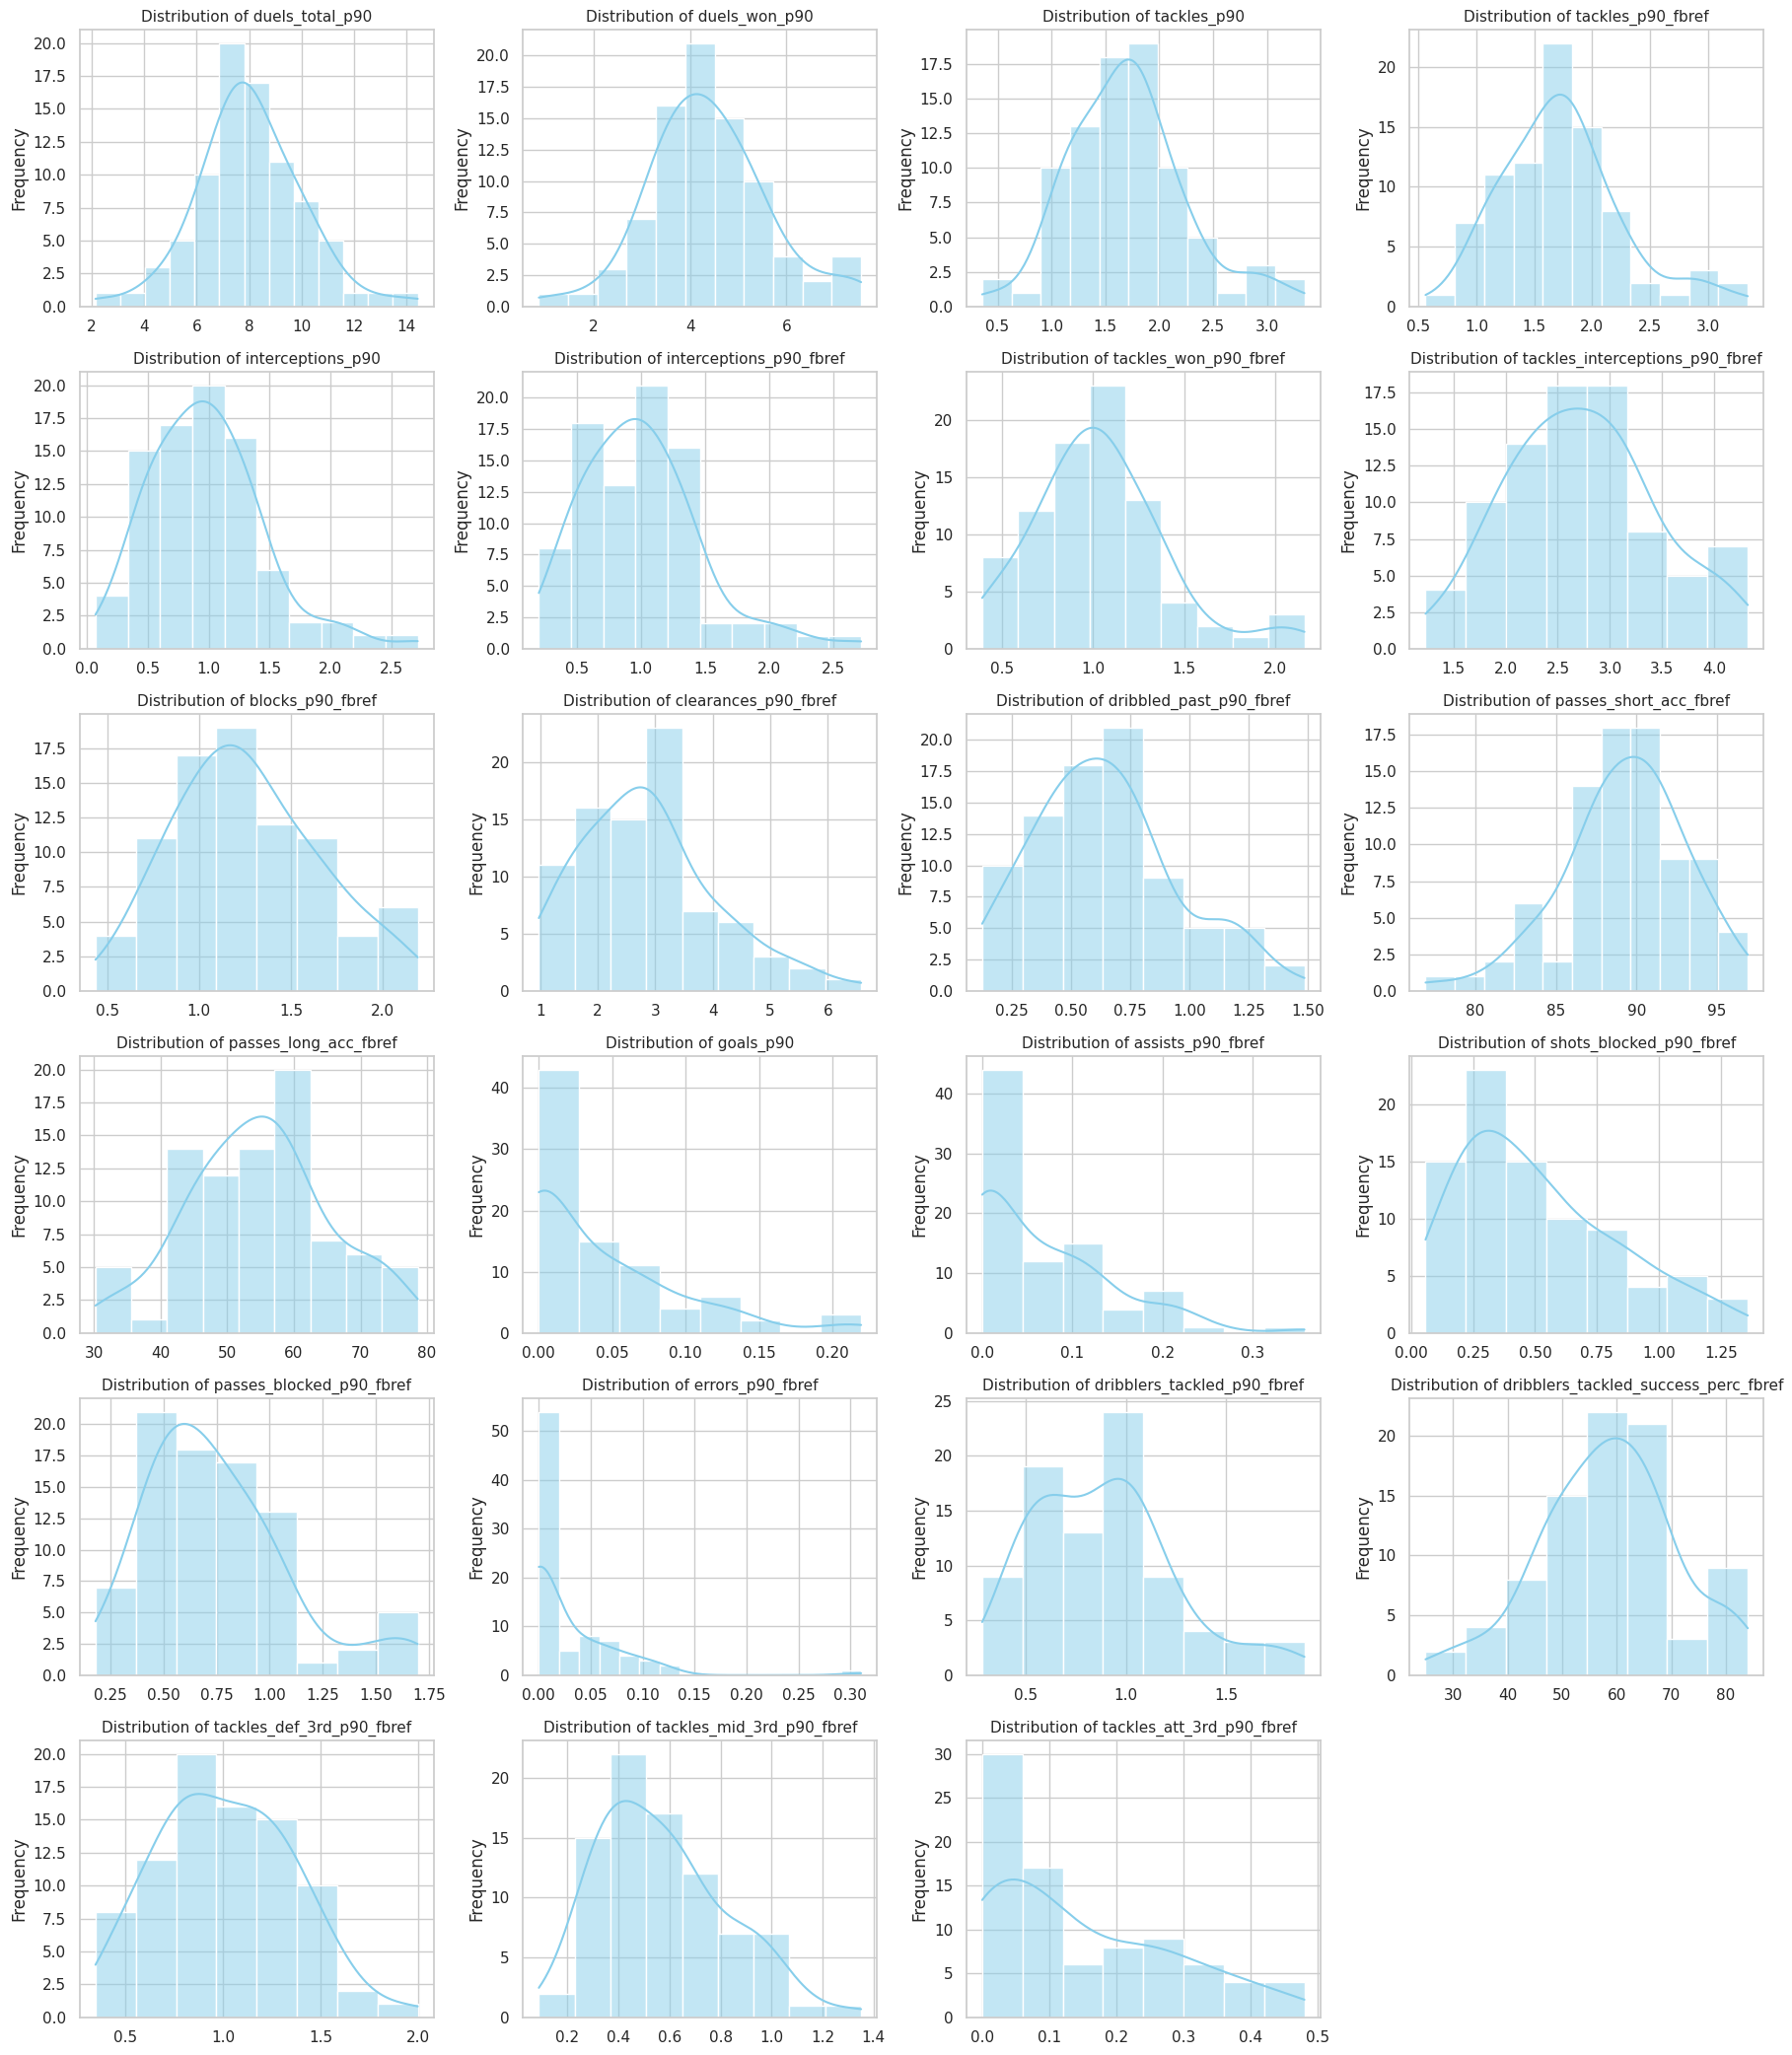

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (18, 14)

# Load preprocessed Serie A defenders dataset
try:
    df_defenders_renamed = pd.read_csv("seriea_defenders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A defender dataset loaded successfully for EDA.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_preprocessed.csv' not found.")
    exit()
except Exception as e:
    print(f"❌ Unexpected error while loading dataset: {e}")
    exit()

# Key features for tactical profiling
key_features_defenders = [
   'duels_total_p90',
    'duels_won_p90',
    'tackles_p90',
    'tackles_p90_fbref',
    'interceptions_p90',
    'interceptions_p90_fbref',
    'tackles_won_p90_fbref',
    'tackles_interceptions_p90_fbref',
    'blocks_p90_fbref',
    'clearances_p90_fbref',
    'dribbled_past_p90_fbref',
    'passes_short_acc_fbref',
    'passes_long_acc_fbref',
    'goals_p90',
    'assists_p90_fbref',
    'shots_blocked_p90_fbref',
    'passes_blocked_p90_fbref',
    'errors_p90_fbref',
    'dribblers_tackled_p90_fbref',
    'dribblers_tackled_success_perc_fbref',
    'tackles_def_3rd_p90_fbref',
    'tackles_mid_3rd_p90_fbref',
    'tackles_att_3rd_p90_fbref'
]

# Subplot grid setup
num_features = len(key_features_defenders)
ncols = 4
nrows = (num_features + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4.5, nrows * 3.5))
axes = axes.flatten()

# Plot distributions
for i, feature in enumerate(key_features_defenders):
    if feature in df_defenders_renamed.columns:
        sns.histplot(data=df_defenders_renamed, x=feature, kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f"Distribution of {feature}", fontsize=11)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frequency")
    else:
        print(f"⚠️ Feature not found: '{feature}'")
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Key Takeaways from the Distribution Plots – Serie A DEFENDERS
These visualizations give us a solid glimpse into how the Serie A defenders operate across the pitch. From defending to distribution, here’s what stands out:

**Defensive Actions & Involvement**

*   **Duels Total (p90):** The distribution is fairly spread out, but peaks around 6-8 duels per 90, with a tail extending towards higher numbers (up to around 15). This suggests a core group with moderate duel involvement and a smaller group of players who are much more active in duels.
*   **Duels Won (p90):** Similar to total duels, the distribution is right-skewed, peaking around 3-5 duels won per 90. There are players winning significantly more duels, indicating strong one-on-one defensive capabilities in a segment of the league.
*   **Tackles (API p90) & Tackles (FBref p90):** Both API and FBref tackle metrics show similar distributions, generally clustered below 2.5 tackles per 90, with a few players making over 3. There's good agreement between the two sources on the distribution shape for this core defensive action.
*   **Tackles Won (FBref p90):** This metric is also right-skewed, with most players winning between 1 and 2 tackles per 90. A few defenders stand out with higher tackles won rates.
*   **Tackles + Interceptions (FBref p90):** This combined metric shows a range from around 2 to 7 per 90, with a peak in the lower half of this range. It reflects the overall defensive activity level of the players.

**Interceptions**

*   **Interceptions (API p90) & Interceptions (FBref p90):** Both API and FBref interceptions distributions are heavily skewed towards lower values, with most players making under 1.5 interceptions per 90. A few players show higher interception rates, indicating a strength in reading the game and cutting off passes.

**Blocks, Clearances & Errors**

*   **Blocks (FBref p90):** The distribution of blocks is also skewed right, with most defenders making between 0.5 and 1.5 blocks per 90.
*   **Clearances (FBref p90):** This metric is right-skewed, with most players making between 1 and 4 clearances per 90. There's a long tail, indicating some defenders make a significantly higher number of clearances.
*   **Shots Blocked (FBref p90):** The distribution is heavily skewed towards lower values, with most defenders blocking less than 0.5 shots per 90.
*   **Passes Blocked (FBref p90):** Similar to shots blocked, this is also skewed right, with most players blocking less than 1 pass per 90.
*   **Errors (FBref p90):** This distribution is heavily concentrated at 0, with a long tail showing a small number of players with higher error rates per 90. This is expected, as errors are relatively rare events.

**Dribbling & Being Dribbled Past**

*   **Dribblers Tackled (FBref p90):** This shows a distribution similar to tackles, mostly clustered below 2 per 90.
*   **Dribbled Past (FBref p90):** The distribution is right-skewed, with most players being dribbled past between 0.5 and 1.5 times per 90.

**Passing Accuracy**

*   **Passes Short Accuracy (FBref %):** The distribution is tightly clustered at the higher end, with a peak around 90-95%. This indicates that most Serie A defenders are highly accurate with short passes.
*   **Passes Long Accuracy (FBref %):** The distribution is more spread out and less skewed than short passes, with a peak around 50-60%. This suggests more variability in long passing ability among defenders.

**Attacking Contribution**

*   **Goals (p90):** Heavily skewed towards zero, as expected for defenders. A small number of players have a very low goals per 90 rate.
*   **Assists (FBref p90):** Also heavily skewed towards zero, with a few players providing a low number of assists per 90.

**Tackling Location**

*   **Tackles Defensive 3rd (FBref p90):** The distribution peaks around 1-2 tackles per 90 in the defensive third, as expected for defenders.
*   **Tackles Mid 3rd (FBref p90):** The distribution is skewed right, with most tackles in the middle third occurring below 1 per 90.
*   **Tackles Attacking 3rd (FBref p90):** Heavily skewed towards zero, indicating that tackles in the attacking third are rare for defenders.

Overall, the distributions highlight the typical defensive and passing profiles of Serie A defenders, showing that while some metrics have a relatively tight range, others are more spread out, with a few players standing out as outliers in certain areas.

I am creating a heatmap to visualize correlations between tactical features

-This helps identify which stats tend to move together and which ones are independent

-Useful to understand potential clusters and avoid feature redundancy

✅ Preprocessed Serie A defender dataset loaded successfully for correlation analysis.


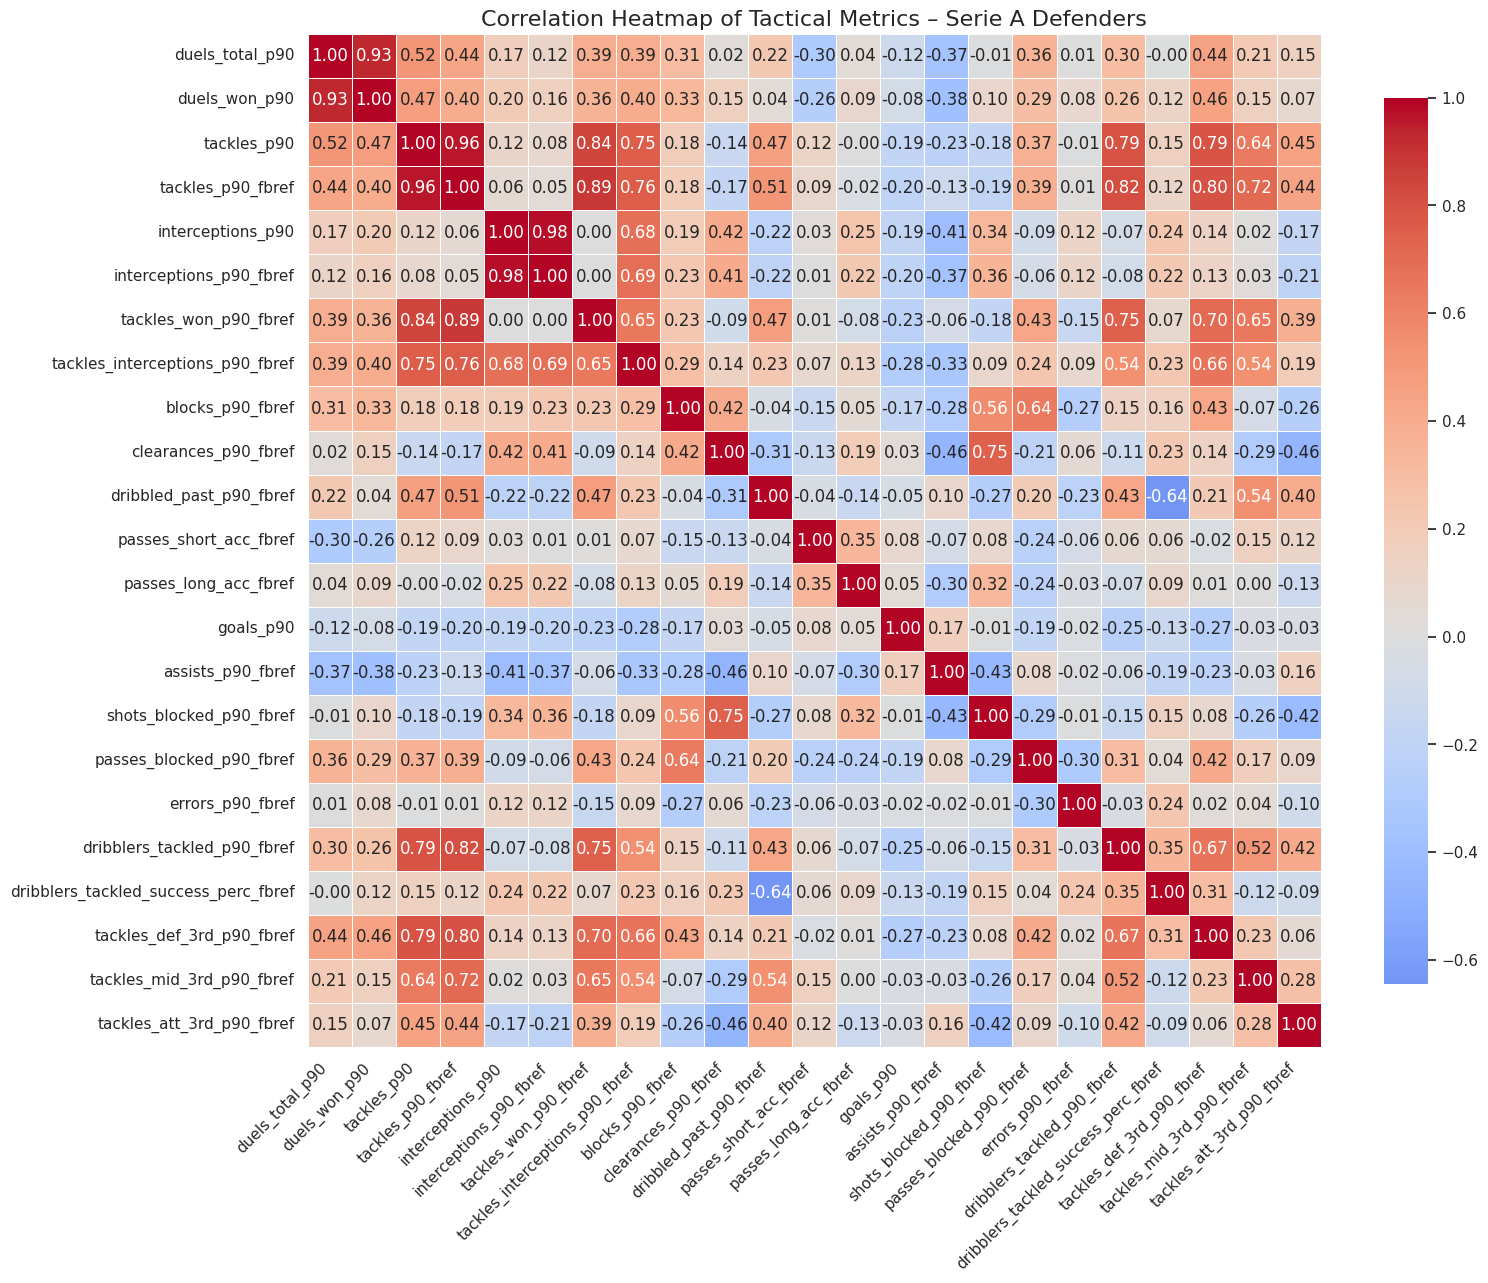

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seaborn style for clean visuals
sns.set(style="whitegrid")

# Load Serie A preprocessed defender dataset
try:
    df_defenders_renamed = pd.read_csv("seriea_defenders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A defender dataset loaded successfully for correlation analysis.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists and has been preprocessed.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")
    exit()

# Define features for correlation analysis
corr_features = [
    'duels_total_p90',
    'duels_won_p90',
    'tackles_p90',
    'tackles_p90_fbref',
    'interceptions_p90',
    'interceptions_p90_fbref',
    'tackles_won_p90_fbref',
    'tackles_interceptions_p90_fbref',
    'blocks_p90_fbref',
    'clearances_p90_fbref',
    'dribbled_past_p90_fbref',
    'passes_short_acc_fbref',
    'passes_long_acc_fbref',
    'goals_p90',
    'assists_p90_fbref',
    'shots_blocked_p90_fbref',
    'passes_blocked_p90_fbref',
    'errors_p90_fbref',
    'dribblers_tackled_p90_fbref',
    'dribblers_tackled_success_perc_fbref',
    'tackles_def_3rd_p90_fbref',
    'tackles_mid_3rd_p90_fbref',
    'tackles_att_3rd_p90_fbref'
]

# Check which columns are valid
existing_corr_features = [feature for feature in corr_features if feature in df_defenders_renamed.columns]

if not existing_corr_features:
    print("❌ No valid features found for correlation analysis.")
else:
    corr_matrix = df_defenders_renamed[existing_corr_features].corr()

    plt.figure(figsize=(16, 14))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt=".2f",
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": .75}
    )
    plt.title("Correlation Heatmap of Tactical Metrics – Serie A Defenders", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


# Observations from the Correlation Heatmap – Serie A Defenders

The heatmap reveals how different defensive and passing metrics relate to each other for Serie A defenders. Here are some key observations and what they suggest about defender roles:

**Defensive Actions & Involvement:**

*   **Duels and Tackles:** As expected, `duels_total_p90` and `duels_won_p90` are highly correlated (around 0.93), indicating that defenders involved in many duels also tend to win a high proportion of them. `tackles_p90` (both API and FBref versions) show moderate positive correlations with `duels_total_p90` and `duels_won_p90` (around 0.4-0.5), and a very strong correlation with each other (around 0.96), confirming consistency between the data sources. `tackles_won_p90_fbref` is also strongly correlated with total FBref tackles (around 0.89). This suggests a group of players who actively engage in ground duels and are effective at winning the ball.
*   **Tackles and Interceptions:** `tackles_interceptions_p90_fbref` shows strong positive correlations with both `tackles_p90_fbref` (around 0.76) and `interceptions_p90_fbref` (around 0.69), as expected since it's a combined metric. The API `tackles_p90` and `interceptions_p90` show a weak positive correlation (around 0.12). This highlights players who are active in both direct ball winning (tackles) and reading the game to cut off passes (interceptions).

**Defensive Coverage Metrics:**

*   Metrics like `blocks_p90_fbref` and `clearances_p90_fbref` show a moderate positive correlation with each other (around 0.42). `shots_blocked_p90_fbref` and `passes_blocked_p90_fbref` are moderately to strongly correlated with `blocks_p90_fbref` (around 0.56 and 0.64 respectively). This indicates a set of actions related to preventing threats closer to the goal, often involving positioning and reacting to incoming shots or passes.
*   `dribbled_past_p90_fbref` shows a moderate negative correlation with `dribblers_tackled_success_perc_fbref` (around -0.64), which is logical – players who are successfully tackled less often tend to be dribbled past more often.

**Passing and Distribution:**

*   `passes_short_acc_fbref` and `passes_long_acc_fbref` have a weak positive correlation (around 0.09). This suggests that accuracy in short passing does not strongly predict accuracy in long passing for these defenders.
*   `assists_p90_fbref` shows weak to moderate negative correlations with several defensive metrics like `duels_total_p90` (around -0.37) and `interceptions_p90` (around -0.41). This hints at a potential trade-off where defenders more involved in direct defensive actions might be less involved in attacking play leading to assists, and vice versa.

**Location-Based Tackling:**

*   As expected, `tackles_def_3rd_p90_fbref` is strongly correlated with overall `tackles_p90_fbref` (around 0.80). `tackles_mid_3rd_p90_fbref` and `tackles_att_3rd_p90_fbref` show weaker correlations with total tackles, and relatively weak correlations with each other, indicating distinct areas of tackling activity on the pitch.

**Other Observations:**

*   `errors_p90_fbref` shows weak correlations with most other metrics, which is expected as errors are generally independent events not strongly tied to specific high-volume actions.
*   `goals_p90` shows weak correlations across the board, which is also expected for defenders as scoring is not a primary function and is relatively infrequent.

Overall, the heatmap confirms expected relationships between similar metrics (e.g., tackles from different sources, total vs. won duels) and highlights some interesting patterns, such as the inverse relationship between being dribbled past and tackle success rate, and the weak negative correlation between high defensive involvement and assist rate. These insights will be valuable when selecting features and interpreting the results of the clustering analysis.

I am plotting boxplots to detect outliers and visualize distribution spread.
This helps identify which players (or roles) stand out significantly from the average behavior.

✅ Preprocessed Serie A defender dataset loaded successfully for EDA.

--- Generating Boxplot Visualizations ---


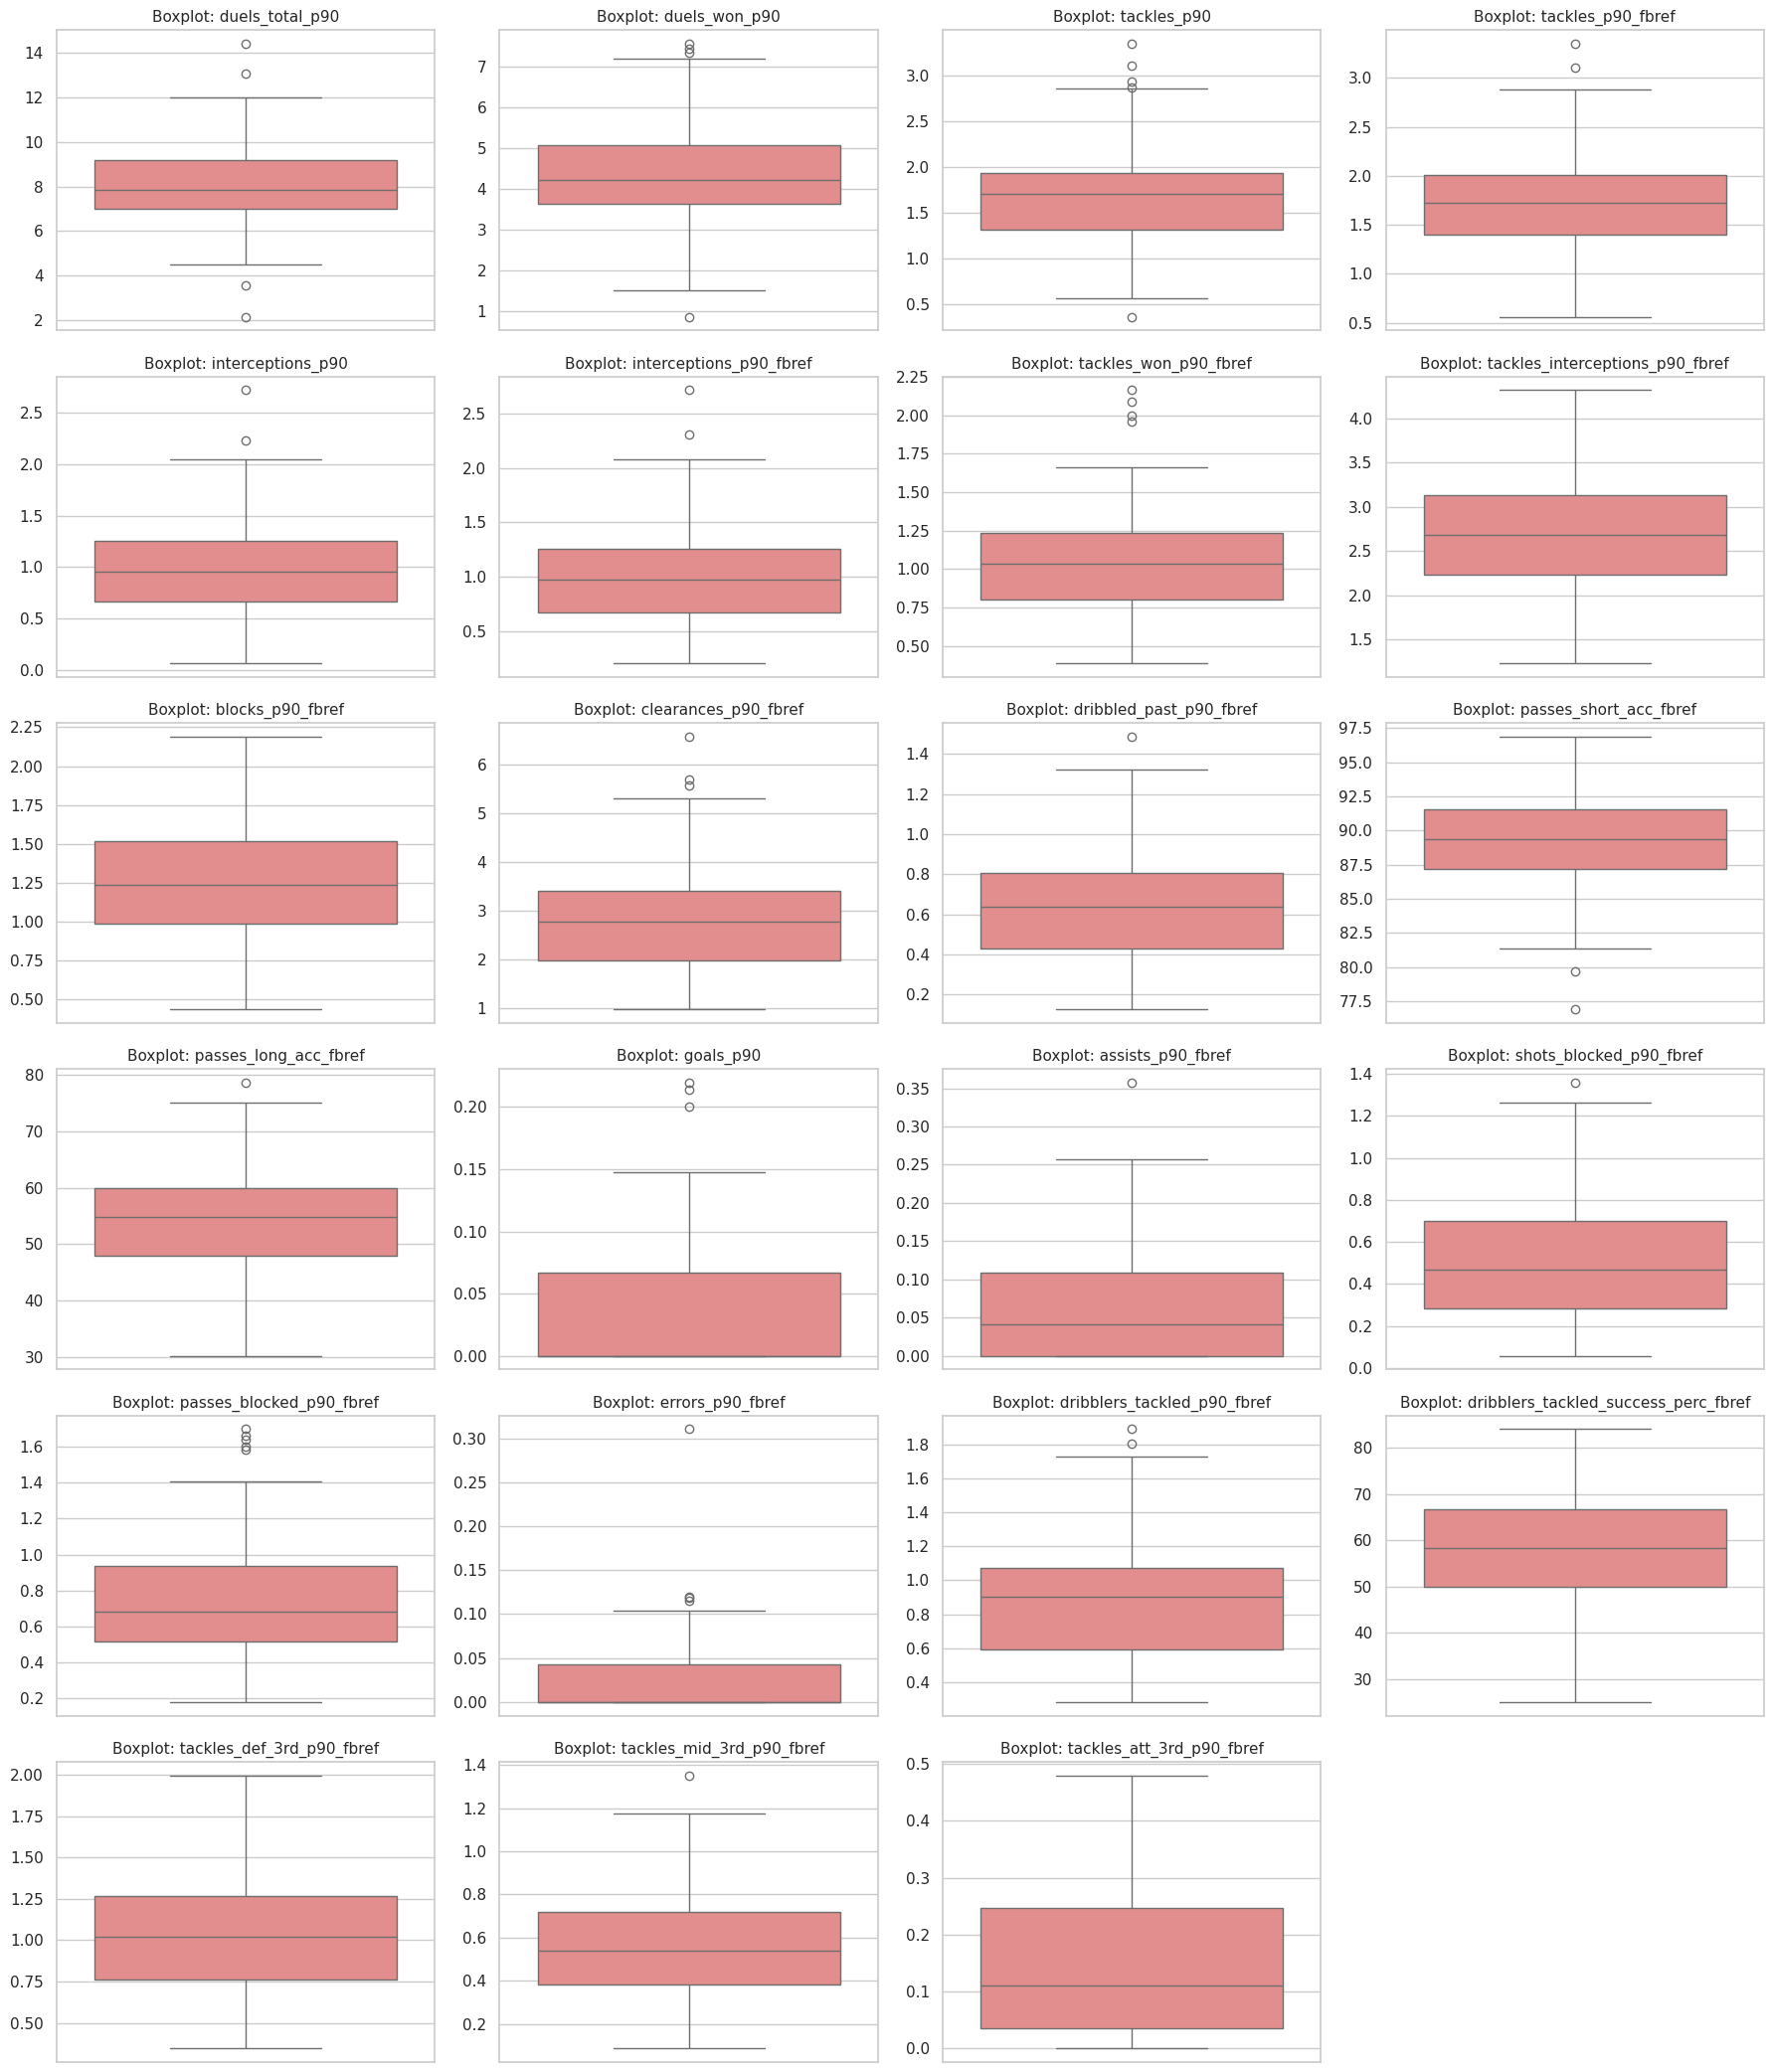

✅ Boxplot visualizations generated.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seaborn style setup
sns.set(style="whitegrid")

# Load preprocessed Serie A defender dataset
try:
    df_defenders_renamed = pd.read_csv("seriea_defenders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A defender dataset loaded successfully for EDA.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_preprocessed.csv' not found.")
    exit()
except Exception as e:
    print(f"❌ Unexpected error while loading dataset: {e}")
    exit()

# List of key metrics to plot
analysis_features = [
    'duels_total_p90',
    'duels_won_p90',
    'tackles_p90',
    'tackles_p90_fbref',
    'interceptions_p90',
    'interceptions_p90_fbref',
    'tackles_won_p90_fbref',
    'tackles_interceptions_p90_fbref',
    'blocks_p90_fbref',
    'clearances_p90_fbref',
    'dribbled_past_p90_fbref',
    'passes_short_acc_fbref',
    'passes_long_acc_fbref',
    'goals_p90',
    'assists_p90_fbref',
    'shots_blocked_p90_fbref',
    'passes_blocked_p90_fbref',
    'errors_p90_fbref',
    'dribblers_tackled_p90_fbref',
    'dribblers_tackled_success_perc_fbref',
    'tackles_def_3rd_p90_fbref',
    'tackles_mid_3rd_p90_fbref',
    'tackles_att_3rd_p90_fbref',
]

# Filter only existing columns
existing_features = [f for f in analysis_features if f in df_defenders_renamed.columns]

if not existing_features:
    print("❌ No valid features found for boxplot analysis.")
else:
    print("\n--- Generating Boxplot Visualizations ---")
    num_plots = len(existing_features)
    ncols = 4
    nrows = (num_plots + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4.5, nrows * 3.5))
    axes = axes.flatten()

    for i, feature in enumerate(existing_features):
        sns.boxplot(data=df_defenders_renamed, y=feature, ax=axes[i], color='lightcoral')
        axes[i].set_title(f"Boxplot: {feature}", fontsize=11)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    print("✅ Boxplot visualizations generated.")


# Boxplot Summary – Serie A DEFENDERS

**Duels & Tackles:**

The boxplots for `duels_total_p90`, `duels_won_p90`, and `tackles_p90` (both API and FBref) show a range of engagement levels. Most defenders fall within a central box, but there are notable outliers with significantly higher values, indicating players who are particularly active and successful in ground duels and tackling. `tackles_won_p90_fbref` shows a similar pattern with a concentration of players winning a moderate number of tackles per 90, and outliers who win significantly more. `dribblers_tackled_p90_fbref` also exhibits outliers, suggesting some defenders are particularly good at tackling players attempting to dribble past them. `dribblers_tackled_success_perc_fbref` shows a wide spread, indicating variability in how successful defenders are at tackling dribblers.

**Interceptions & Defensive Actions:**

The boxplots for `interceptions_p90` (API and FBref) and `tackles_interceptions_p90_fbref` are generally skewed towards lower values, with a few outliers showing higher rates of interceptions or combined defensive actions. This suggests that while most defenders contribute to reading the game, a smaller group excels in proactively cutting off passes and combining tackles with interceptions.

**Defensive Coverage Metrics:**

The boxplots for `blocks_p90_fbref` and `clearances_p90_fbref` show some variation in the data spread, with several outliers indicating defenders who perform a significantly higher number of blocks or clearances. This points to players who are more focused on preventing shots and clearing the ball from dangerous areas, potentially acting as more traditional, deep-lying defenders. `shots_blocked_p90_fbref` and `passes_blocked_p90_fbref` also show outliers, particularly in passes blocked, suggesting some defenders are more active in disrupting opposition passing lanes.

**Being Dribbled Past & Errors:**

`dribbled_past_p90_fbref` shows a right-skewed distribution with outliers, indicating that most defenders are dribbled past a relatively low number of times, but some are more frequently beaten. `errors_p90_fbref` is heavily concentrated at zero, with very few outliers, as expected since errors leading to shots or goals are rare events.

**Passing Accuracy:**

*   **passes_short_acc_fbref:** The boxplot for short pass accuracy is tightly clustered at high percentages, with a high median. This indicates that most Serie A defenders are highly reliable with their short passing.
*   **passes_long_acc_fbref:** The boxplot for long pass accuracy shows a much wider spread and a lower median compared to short passes. This suggests more variability in long passing ability among defenders, and that it is a less consistently high-percentage action than short passing.

**Attacking Contribution:**

The boxplots for `goals_p90` and `assists_p90_fbref` are heavily skewed towards zero with several outliers, which is expected for defenders as direct attacking contributions are not their primary role and occur less frequently.

**Tackling Location:**

The boxplots for `tackles_def_3rd_p90_fbref`, `tackles_mid_3rd_p90_fbref`, and `tackles_att_3rd_p90_fbref` show that most tackles occur in the defensive third, with fewer in the midfield third and very few in the attacking third, aligning with the typical positioning and responsibilities of defenders. Outliers exist in each category, indicating players who might be more active in specific areas of the pitch.

#3. DATA CLEANING

#3.1.1 Data Cleaning-SERIE A DEFENDERS

This part ensures my dataset is clean, consistent, and ready for clustering. I’ll go through key checks.

In [14]:
import pandas as pd

# Load the preprocessed Serie A defender dataset
try:
    df_defenders_renamed = pd.read_csv("seriea_defenders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A defender dataset loaded successfully for data type check.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Check and display data types of each column
print("\n📋 Data types of the preprocessed Serie A defender dataset:")
print(df_defenders_renamed.dtypes)


✅ Preprocessed Serie A defender dataset loaded successfully for data type check.

📋 Data types of the preprocessed Serie A defender dataset:
name                                object
team                                object
position                            object
minutes                            float64
duels_total_api                    float64
                                    ...   
passes_blocked_p90_fbref           float64
interceptions_p90_fbref            float64
tackles_interceptions_p90_fbref    float64
clearances_p90_fbref               float64
errors_p90_fbref                   float64
Length: 81, dtype: object


It looks like we have correct data types as name, team and position are object whereas the rest are float64.

In [2]:
import pandas as pd

# Load the preprocessed Serie A defender dataset
try:
    df_defenders_renamed = pd.read_csv("seriea_defenders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A defender dataset loaded successfully for duplicate check.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Check for duplicated rows
num_duplicates = df_defenders_renamed.duplicated().sum()
print(f"\n🔍 Number of duplicated rows in the preprocessed Serie A defender dataset: {num_duplicates}")

if num_duplicates == 0:
    print("✅ No duplicate rows found. The dataset is ready for further analysis.")
else:
    print("⚠️ Duplicate rows found. Consider reviewing and deduplicating before clustering.")


✅ Preprocessed Serie A defender dataset loaded successfully for duplicate check.

🔍 Number of duplicated rows in the preprocessed Serie A defender dataset: 0
✅ No duplicate rows found. The dataset is ready for further analysis.


0 duplicates

In [3]:
import pandas as pd

# Load the preprocessed Serie A defender dataset
try:
    df_defenders_renamed = pd.read_csv("seriea_defenders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A defender dataset loaded successfully for unique value check.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Display number of unique player names and teams
print("\n🔢 Unique player names:", df_defenders_renamed['name'].nunique())
print("🏟️ Unique teams:", df_defenders_renamed['team'].nunique())


✅ Preprocessed Serie A defender dataset loaded successfully for unique value check.

🔢 Unique player names: 84
🏟️ Unique teams: 20


In [4]:
import pandas as pd

# Load the preprocessed Serie A defender dataset
try:
    df_defenders_renamed = pd.read_csv("seriea_defenders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A defender dataset loaded successfully for final missing value check.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Check for missing values
missing_values_final = df_defenders_renamed.isnull().sum()
missing_values_summary = missing_values_final[missing_values_final > 0].sort_values(ascending=False)

if missing_values_summary.empty:
    print("\n✅ No missing values found in the preprocessed dataset. Data is clean!")
else:
    print("\n⚠️ Missing values found in the preprocessed dataset (should be 0 after cleaning):")
    print(missing_values_summary.to_string())
    print("\nPlease recheck preprocessing and rerun the cleaning pipeline if needed.")


✅ Preprocessed Serie A defender dataset loaded successfully for final missing value check.

✅ No missing values found in the preprocessed dataset. Data is clean!


In [5]:
import pandas as pd

# Load the preprocessed Serie A defender dataset
try:
    df_defenders_preprocessed = pd.read_csv("seriea_defenders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A defender dataset loaded successfully for feature selection.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_preprocessed.csv' not found.")
    print("Please ensure this file has been generated by the previous preprocessing step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Select clustering-relevant metrics (per-90 and % based)
selected_metrics_for_clustering = [
    'duels_total_p90', 'duels_won_p90', 'interceptions_p90', 'interceptions_p90_fbref',
    'tackles_p90', 'tackles_p90_fbref', 'tackles_won_p90_fbref', 'tackles_interceptions_p90_fbref',
    'blocks_p90_fbref', 'shots_blocked_p90_fbref', 'passes_blocked_p90_fbref', 'clearances_p90_fbref',
    'dribbled_past_p90_fbref', 'errors_p90_fbref', 'passes_total_p90', 'passes_completed_p90_fbref',
    'passes_short_cmp_p90_fbref', 'passes_short_att_p90_fbref', 'passes_medium_cmp_p90_fbref',
    'passes_medium_att_p90_fbref', 'passes_long_cmp_p90_fbref', 'passes_long_att_p90_fbref',
    'passes_total_accuracy_api', 'passes_short_acc_fbref', 'passes_medium_acc_fbref',
    'passes_long_acc_fbref', 'goals_p90', 'assists_p90_fbref', 'dribblers_tackled_success_perc_fbref',
    'dribblers_tackled_p90_fbref', 'tackles_def_3rd_p90_fbref', 'tackles_mid_3rd_p90_fbref',
    'tackles_att_3rd_p90_fbref'
]

# Filter existing columns
existing_selected_metrics = [col for col in selected_metrics_for_clustering if col in df_defenders_preprocessed.columns]

if len(existing_selected_metrics) != len(selected_metrics_for_clustering):
    missing = set(selected_metrics_for_clustering) - set(existing_selected_metrics)
    print(f"⚠️ Warning: Missing metrics from dataset: {missing}")
    print("Please verify preprocessing steps.")

df_features_for_clustering = df_defenders_preprocessed[existing_selected_metrics].copy()
print(f"✅ Selected {len(existing_selected_metrics)} features for clustering.")

# Save to CSV
output_filename = "seriea_defenders_2023_24_selected_metrics.csv"
df_features_for_clustering.to_csv(output_filename, index=False)
print(f"✅ Selected features dataset saved as: {output_filename}")

# Display summary
print("\n--- Summary of Features for Clustering ---")
print(f"Final dataset shape: {df_features_for_clustering.shape}")
print("\nColumn types:")
print(df_features_for_clustering.dtypes.value_counts())
print("\nFirst 5 rows of the features for clustering:")
print(df_features_for_clustering.head().to_string())


✅ Preprocessed Serie A defender dataset loaded successfully for feature selection.
✅ Selected 33 features for clustering.
✅ Selected features dataset saved as: seriea_defenders_2023_24_selected_metrics.csv

--- Summary of Features for Clustering ---
Final dataset shape: (84, 33)

Column types:
float64    33
Name: count, dtype: int64

First 5 rows of the features for clustering:
   duels_total_p90  duels_won_p90  interceptions_p90  interceptions_p90_fbref  tackles_p90  tackles_p90_fbref  tackles_won_p90_fbref  tackles_interceptions_p90_fbref  blocks_p90_fbref  shots_blocked_p90_fbref  passes_blocked_p90_fbref  clearances_p90_fbref  dribbled_past_p90_fbref  errors_p90_fbref  passes_total_p90  passes_completed_p90_fbref  passes_short_cmp_p90_fbref  passes_short_att_p90_fbref  passes_medium_cmp_p90_fbref  passes_medium_att_p90_fbref  passes_long_cmp_p90_fbref  passes_long_att_p90_fbref  passes_total_accuracy_api  passes_short_acc_fbref  passes_medium_acc_fbref  passes_long_acc_fbref  goals

#4. FEATURE ENGINEERING

#4.1.1 Feature engineering -SERIE A DEFENDERS

#One-hot encoding

This step is crucial for preparing the 'team' categorical variable for machine learning. By converting team names into a numerical, binary format through one-hot encoding, I ensure that the clustering algorithm can properly interpret and utilize team affiliation as a factor in grouping players, maintaining consistency with the approach taken for other positions like defenders.

In [6]:
import pandas as pd

# Step 1: Load preprocessed Serie A defender dataset
try:
    df_preprocessed = pd.read_csv("seriea_defenders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Serie A defender dataset loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_preprocessed.csv' not found.")
    exit()
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    exit()

# Step 2: Perform one-hot encoding on the 'team' column
df_encoded = pd.get_dummies(df_preprocessed, columns=['team'], drop_first=True)
print("✅ One-hot encoding applied to 'team' column.")

# Step 3: Verify that 'team' column has been removed
if 'team' in df_encoded.columns:
    print("❌ ERROR: 'team' column still present after encoding.")
    df_encoded.drop(columns=['team'], inplace=True)
    print("✅ Dropped 'team' column manually.")
else:
    print("✅ Original 'team' column removed successfully after encoding.")

# Step 4: Save final encoded dataset
output_file = "seriea_defenders_2023_24_preprocessed_encoded_team.csv"
df_encoded.to_csv(output_file, index=False)
print(f"✅ Encoded Serie A dataset saved as: {output_file}")

# Step 5: Preview encoded output
print("\n🔎 First 5 rows of encoded dataset:")
print(df_encoded.head().to_string())
print("\n📊 Columns in final encoded dataset:")
print(df_encoded.columns.tolist())


✅ Preprocessed Serie A defender dataset loaded successfully.
✅ One-hot encoding applied to 'team' column.
✅ Original 'team' column removed successfully after encoding.
✅ Encoded Serie A dataset saved as: seriea_defenders_2023_24_preprocessed_encoded_team.csv

🔎 First 5 rows of encoded dataset:
             name  position  minutes  duels_total_api  duels_won_api  goals_total  shots_total  shots_on_target  dribbles_attempts  dribbles_success  touches_total  passes_total_api  passes_total_accuracy_api  tackles_api  interceptions_api  shots_on_target_perc  dribbles_success_perc            name_clean   team_clean     player_name_fbref nation_fbref  90s_played_fbref  passes_completed_total_fbref  passes_short_cmp_fbref  passes_short_att_fbref  passes_short_acc_fbref  passes_medium_cmp_fbref  passes_medium_att_fbref  passes_medium_acc_fbref  passes_long_cmp_fbref  passes_long_att_fbref  passes_long_acc_fbref  assists_fbref_total Nation_fbref_def  Age_fbref_def  Born_fbref_def  90s_fbref_def  

In [7]:
import pandas as pd

# Step 1: Load one-hot encoded Serie A defender dataset
try:
    df_defenders_preprocessed = pd.read_csv("seriea_defenders_2023_24_preprocessed_encoded_team.csv")
    print("✅ Preprocessed Serie A defender dataset (with optional team encoding) loaded successfully for feature selection.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_preprocessed_encoded_team.csv' not found.")
    print("Please ensure this file has been generated from the team encoding step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")
    exit()

# Refined metrics for clustering (correlation-filtered)
base_metrics_for_clustering = [
    'duels_total_p90', 'duels_won_p90', 'interceptions_p90', 'interceptions_p90_fbref',
    'tackles_p90', 'tackles_p90_fbref', 'tackles_won_p90_fbref', 'tackles_interceptions_p90_fbref',
    'blocks_p90_fbref', 'shots_blocked_p90_fbref', 'passes_blocked_p90_fbref',
    'clearances_p90_fbref', 'dribbled_past_p90_fbref',
    'passes_short_acc_fbref', 'passes_medium_acc_fbref', 'passes_long_acc_fbref',
    'goals_p90', 'assists_p90_fbref', 'dribblers_tackled_success_perc_fbref',
    'dribblers_tackled_p90_fbref', 'tackles_def_3rd_p90_fbref',
    'tackles_mid_3rd_p90_fbref', 'tackles_att_3rd_p90_fbref'
]

# Collect one-hot encoded team columns
team_encoded_cols = [col for col in df_defenders_preprocessed.columns if col.startswith('team_')]

# Final features list
selected_metrics_for_clustering = base_metrics_for_clustering + team_encoded_cols

# Identify identifier / categorical columns to exclude
columns_to_exclude = [
    'name', 'position', 'name_clean', 'team_clean', 'Player', 'Nation',
    'Nation_fbref_def', 'Age_fbref_def', 'Born_fbref_def'
]

# Drop those columns if present
existing_cols_to_exclude = [col for col in columns_to_exclude if col in df_defenders_preprocessed.columns]
df_features_for_clustering = df_defenders_preprocessed.drop(columns=existing_cols_to_exclude, errors='ignore').copy()

# Retain only selected metrics
df_features_for_clustering = df_features_for_clustering[
    [col for col in selected_metrics_for_clustering if col in df_features_for_clustering.columns]
].copy()

# Convert any boolean columns to float64
for col in df_features_for_clustering.select_dtypes(include='bool').columns:
    df_features_for_clustering[col] = df_features_for_clustering[col].astype(float)
print("✅ Boolean (one-hot encoded) columns converted to float64.")

# Final check for non-numeric leftovers
non_numeric_cols = df_features_for_clustering.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
if non_numeric_cols:
    print(f"❌ Error: Non-numeric columns found: {non_numeric_cols}")
    exit()

print(f"✅ Selected {len(df_features_for_clustering.columns)} features for clustering (including team encoding).")

# Save to CSV
output_filename = "seriea_defenders_2023_24_selected_metrics.csv"
df_features_for_clustering.to_csv(output_filename, index=False)
print(f"✅ Selected features dataset saved as: {output_filename}")

# Summary preview
print("\n--- Summary of Features for Clustering ---")
print(f"Final dataset shape: {df_features_for_clustering.shape}")
print("\nColumn types:")
print(df_features_for_clustering.dtypes.value_counts())
print("\nFirst 5 rows of the features for clustering:")
print(df_features_for_clustering.head().to_string())


✅ Preprocessed Serie A defender dataset (with optional team encoding) loaded successfully for feature selection.
✅ Boolean (one-hot encoded) columns converted to float64.
✅ Selected 42 features for clustering (including team encoding).
✅ Selected features dataset saved as: seriea_defenders_2023_24_selected_metrics.csv

--- Summary of Features for Clustering ---
Final dataset shape: (84, 42)

Column types:
float64    42
Name: count, dtype: int64

First 5 rows of the features for clustering:
   duels_total_p90  duels_won_p90  interceptions_p90  interceptions_p90_fbref  tackles_p90  tackles_p90_fbref  tackles_won_p90_fbref  tackles_interceptions_p90_fbref  blocks_p90_fbref  shots_blocked_p90_fbref  passes_blocked_p90_fbref  clearances_p90_fbref  dribbled_past_p90_fbref  passes_short_acc_fbref  passes_medium_acc_fbref  passes_long_acc_fbref  goals_p90  assists_p90_fbref  dribblers_tackled_success_perc_fbref  dribblers_tackled_p90_fbref  tackles_def_3rd_p90_fbref  tackles_mid_3rd_p90_fbref 

#Standard Scaling of Numerical Features

Before applying clustering, we need to make sure all numerical features contribute equally. Some metrics are much larger in range than others , which can distort clustering results. I solve this using StandardScaler, which transforms each feature to have:

    Mean = 0

    Standard deviation = 1


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the selected features for clustering (already team-encoded)
try:
    df_features_for_clustering = pd.read_csv("seriea_defenders_2023_24_selected_metrics.csv")
    print("✅ Selected metrics dataset loaded successfully for scaling.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_selected_metrics.csv' not found.")
    print("Please ensure this file was generated during the 'Feature Selection for Clustering' step.")
    exit()
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    exit()

# Initialize and apply StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_features_for_clustering)

# Convert back to DataFrame with original column names
df_scaled_features = pd.DataFrame(scaled_array, columns=df_features_for_clustering.columns)
print("✅ Numerical features successfully scaled using StandardScaler.")

# Save the scaled dataset
output_filename = "seriea_defenders_2023_24_scaled_metrics.csv"
df_scaled_features.to_csv(output_filename, index=False)
print(f"✅ Scaled features dataset saved as: {output_filename}")

# Summary preview
print("\n--- Summary of Scaled Features ---")
print(f" Scaled dataset shape: {df_scaled_features.shape}")
print("\n Column types (should all be float64):")
print(df_scaled_features.dtypes.value_counts())
print("\n First 5 rows of scaled data:")
print(df_scaled_features.head().to_string())


✅ Selected metrics dataset loaded successfully for scaling.
✅ Numerical features successfully scaled using StandardScaler.
✅ Scaled features dataset saved as: seriea_defenders_2023_24_scaled_metrics.csv

--- Summary of Scaled Features ---
 Scaled dataset shape: (84, 42)

 Column types (should all be float64):
float64    42
Name: count, dtype: int64

 First 5 rows of scaled data:
   duels_total_p90  duels_won_p90  interceptions_p90  interceptions_p90_fbref  tackles_p90  tackles_p90_fbref  tackles_won_p90_fbref  tackles_interceptions_p90_fbref  blocks_p90_fbref  shots_blocked_p90_fbref  passes_blocked_p90_fbref  clearances_p90_fbref  dribbled_past_p90_fbref  passes_short_acc_fbref  passes_medium_acc_fbref  passes_long_acc_fbref  goals_p90  assists_p90_fbref  dribblers_tackled_success_perc_fbref  dribblers_tackled_p90_fbref  tackles_def_3rd_p90_fbref  tackles_mid_3rd_p90_fbref  tackles_att_3rd_p90_fbref  team_AS Roma  team_Atalanta  team_Bologna  team_Cagliari  team_Empoli  team_Fiorentin

#4.2.1 Final feature selection-SERIE A DEFENDERS

✅ Scaled Serie A features dataset loaded successfully for correlation analysis.


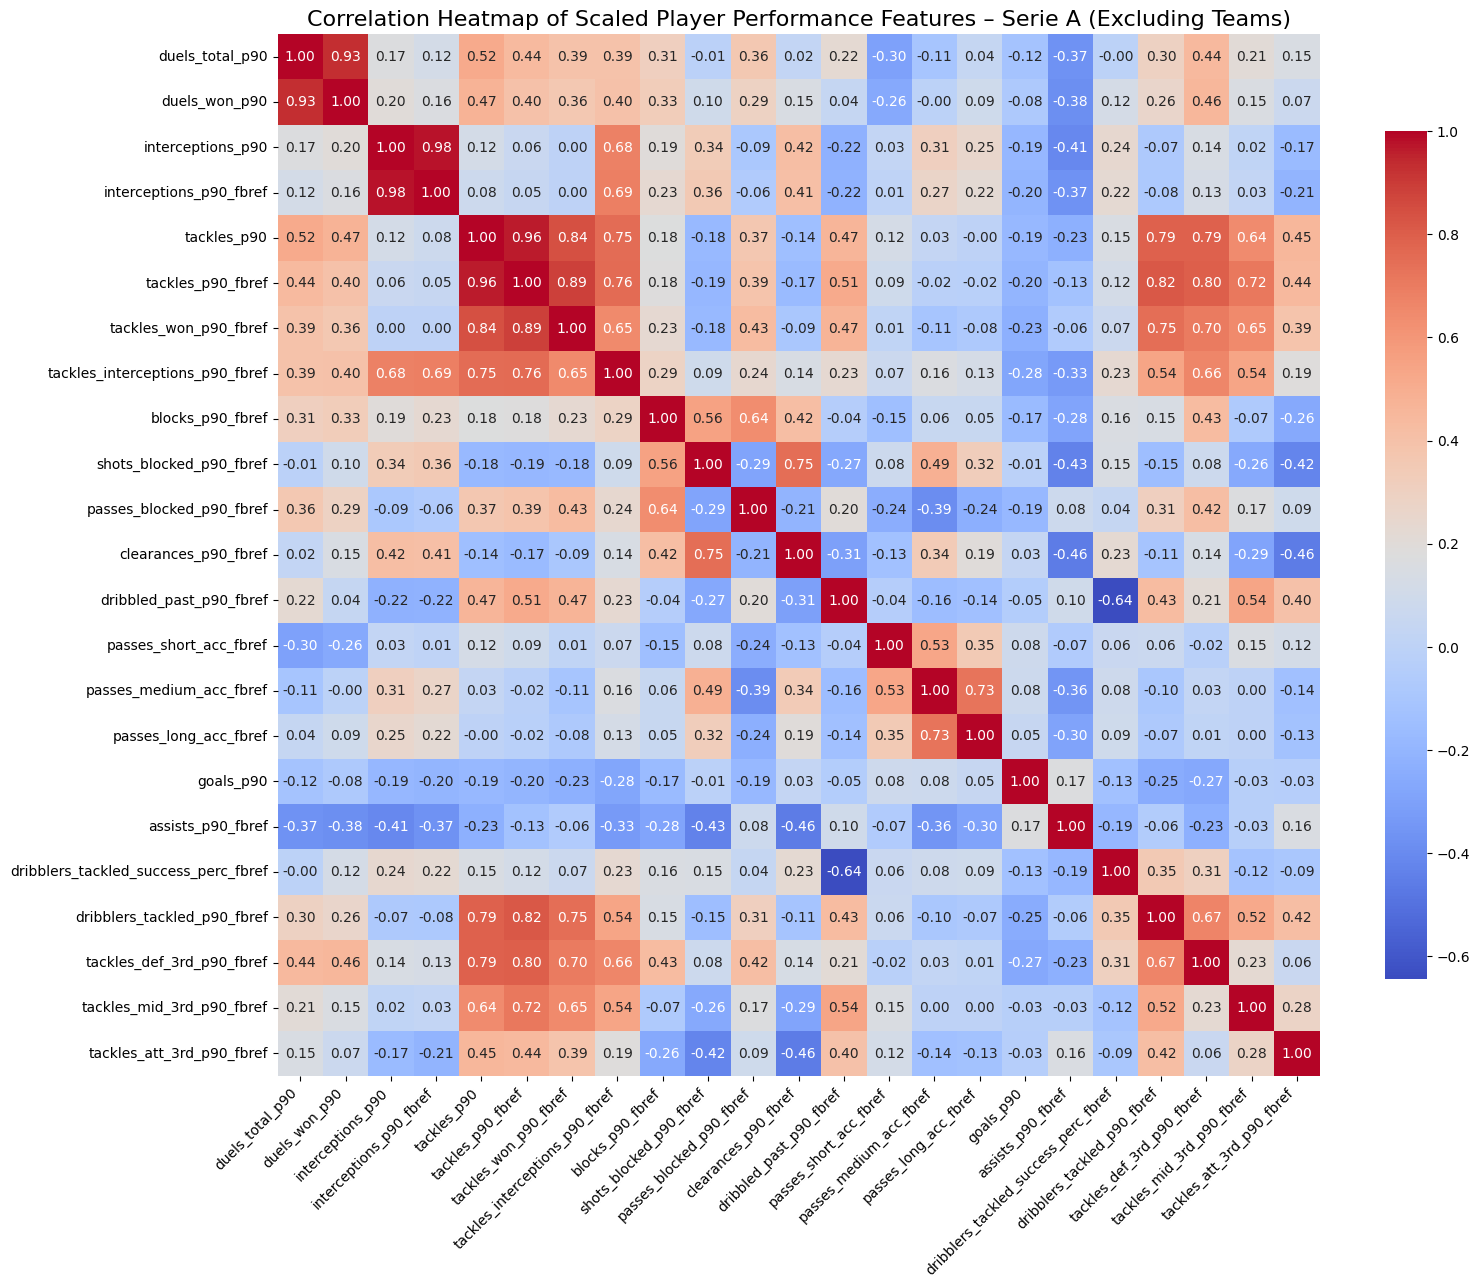

✅ Correlation heatmap of scaled Serie A defender metrics generated (excluding team columns).


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the scaled Serie A metrics
try:
    df_scaled_features = pd.read_csv("seriea_defenders_2023_24_scaled_metrics.csv")
    print("✅ Scaled Serie A features dataset loaded successfully for correlation analysis.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_scaled_metrics.csv' not found.")
    print("Ensure this file was generated by the 'Feature Scaling' step.")
    exit()
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    exit()

# Exclude one-hot encoded team columns for heatmap clarity
clustering_features_for_heatmap = [
    col for col in df_scaled_features.columns if not col.startswith('team_')
]

# Generate correlation matrix
corr_matrix = df_scaled_features[clustering_features_for_heatmap].corr()

# Visualize
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': 0.7})
plt.title("Correlation Heatmap of Scaled Player Performance Features – Serie A (Excluding Teams)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

print("✅ Correlation heatmap of scaled Serie A defender metrics generated (excluding team columns).")


# Explanation of Metric Selection Based on Correlation Heatmap (Defenders)
The heatmap above reveals patterns of correlation between key defensive and passing metrics. Based on these relationships, we can discuss potential selections to retain features that are informative, tactically relevant, and not overly redundant for clustering Serie A defenders.

**Observations and Potential Feature Considerations for Clustering:**
Analyzing the correlations helps us understand which metrics capture similar aspects of a defender's game and which provide unique information.

*   **Duels (duels_total_p90, duels_won_p90):** These are highly correlated (around 0.93). While both are relevant to physical engagement, their strong correlation suggests that keeping both might introduce some redundancy. `duels_won_p90` might be slightly more informative as it focuses on successful outcomes.
*   **Tackles (tackles_p90, tackles_p90_fbref, tackles_won_p90_fbref):** The API (`tackles_p90`) and FBref (`tackles_p90_fbref`) total tackles are very highly correlated (around 0.96), indicating strong agreement between sources. `tackles_won_p90_fbref` is also highly correlated with `tackles_p90_fbref` (around 0.89). This cluster of tackle metrics captures different facets of tackling (attempts vs. success). Keeping `tackles_p90_fbref` (or `tackles_p90`) and `tackles_won_p90_fbref` would provide a good balance of volume and efficiency in tackling.
*   **Interceptions (interceptions_p90, interceptions_p90_fbref):** The API and FBref interceptions are highly correlated (around 0.98). Keeping one of these is likely sufficient to represent a player's ability to read the game and cut off passes.
*   **Combined Defensive Actions (tackles_interceptions_p90_fbref):** This metric shows strong correlations with both FBref tackles (around 0.76) and FBref interceptions (around 0.69). It serves as a good summary metric for overall defensive activity volume. Including it alongside separate tackle and interception metrics might be redundant, depending on the desired granularity.
*   **Blocks (blocks_p90_fbref, shots_blocked_p90_fbref, passes_blocked_p90_fbref):** `blocks_p90_fbref` shows moderate to strong correlations with `shots_blocked_p90_fbref` (around 0.56) and `passes_blocked_p90_fbref` (around 0.64). While related, blocking shots and passes are distinct actions, and keeping all three could provide a more detailed picture of a defender's blocking profile.
*   **Clearances (clearances_p90_fbref):** This metric shows moderate correlations with some blocking metrics (`blocks_p90_fbref` around 0.42, `shots_blocked_p90_fbref` around 0.75) but is not strongly correlated with tackling or interception metrics. It likely captures a distinct defensive action related to clearing danger from the box.
*   **Being Dribbled Past (dribbled_past_p90_fbref) and Dribbler Tackling Success (dribblers_tackled_success_perc_fbref):** `dribbled_past_p90_fbref` has a strong negative correlation with `dribblers_tackled_success_perc_fbref` (around -0.64), which makes tactical sense. Including both can provide insight into both how often a player is beaten by a dribbler and how successful they are when attempting to tackle a dribbler. `dribblers_tackled_p90_fbref` is strongly correlated with overall tackles (around 0.82) and `tackles_def_3rd_p90_fbref` (around 0.67), indicating it's closely tied to tackling volume, particularly in deeper areas.
*   **Passing Accuracy (passes_short_acc_fbref, passes_medium_acc_fbref, passes_long_acc_fbref):** Short, medium, and long pass accuracy show varying degrees of correlation. Short and medium pass accuracy are moderately correlated (around 0.53), medium and long pass accuracy are strongly correlated (around 0.73), but short and long pass accuracy have a weak correlation (around 0.09). Including all three provides a nuanced view of a player's passing ability across different distances.
*   **Attacking Contribution (goals_p90, assists_p90_fbref):** These metrics generally show weak correlations with defensive and passing metrics, as expected. They capture a distinct aspect of a defender's contribution.
*   **Tackling Location (tackles_def_3rd_p90_fbref, tackles_mid_3rd_p90_fbref, tackles_att_3rd_p90_fbref):** Tackles in different thirds of the pitch show varying correlations with overall tackle metrics and with each other. `tackles_def_3rd_p90_fbref` is strongly correlated with total tackles (around 0.80), while `tackles_mid_3rd_p90_fbref` and `tackles_att_3rd_p90_fbref` have weaker correlations. Including these can help differentiate defenders based on where they typically engage defensively.
*   **Errors (errors_p90_fbref):** This metric shows weak correlations with most other features, suggesting it captures a relatively independent aspect of performance.

**Conclusion for Feature Selection:**

Based on this analysis, a balanced set of features for clustering should aim to include metrics that represent:

1.  **Duels:** Perhaps `duels_won_p90` to focus on successful outcomes.
2.  **Tackling:** `tackles_p90_fbref` (or `tackles_p90`) for volume and `tackles_won_p90_fbref` for efficiency. Consider including location-based tackles (`tackles_def_3rd_p90_fbref`, `tackles_mid_3rd_p90_fbref`, `tackles_att_3rd_p90_fbref`) to capture spatial defensive roles.
3.  **Interceptions:** One of the interception metrics (e.g., `interceptions_p90_fbref`).
4.  **Blocking:** `blocks_p90_fbref`, `shots_blocked_p90_fbref`, and `passes_blocked_p90_fbref` to capture different types of blocks.
5.  **Clearances:** `clearances_p90_fbref`.
6.  **Dribbler Engagement:** `dribbled_past_p90_fbref` and `dribblers_tackled_success_perc_fbref`.
7.  **Passing Accuracy:** `passes_short_acc_fbref`, `passes_medium_acc_fbref`, and `passes_long_acc_fbref` for a full picture of distribution ability.
8.  **Attacking Contribution:** `goals_p90` and `assists_p90_fbref`.
9.  **Errors:** `errors_p90_fbref`.

We should avoid including highly correlated metrics from the same category unless there is a specific tactical reason (e.g., including both tackle volume and tackle success rate). The chosen features should capture the diverse aspects of a defender's performance profile while minimizing redundancy. The one-hot encoded team columns should also be included in the final clustering feature set if team style is considered relevant for clustering.

#5. Preprocessing

#5.1.1 Preprocessing-PCA (Principal Component Analysis)- SERIE A DEFENDERS

✅ Scaled features dataset loaded successfully for PCA.
✅ PCA performed. Transformed data shape: (84, 42)


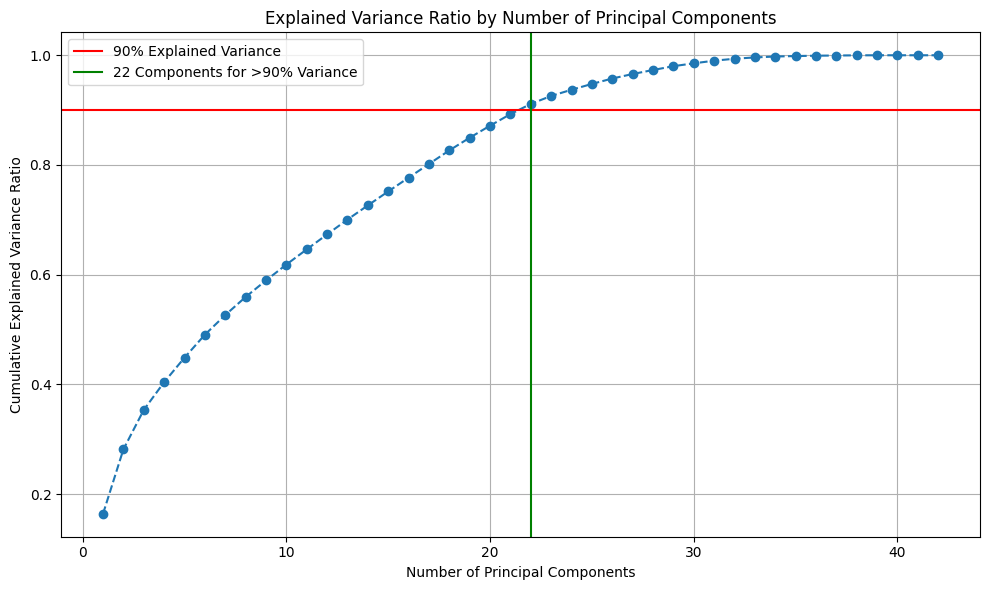

✅ Explained Variance Ratio plot generated.

Explained Variance Ratio per Principal Component:
PC1: 0.1643 (Cumulative: 0.1643)
PC2: 0.1175 (Cumulative: 0.2818)
PC3: 0.0719 (Cumulative: 0.3536)
PC4: 0.0506 (Cumulative: 0.4042)
PC5: 0.0446 (Cumulative: 0.4489)
PC6: 0.0419 (Cumulative: 0.4907)
PC7: 0.0358 (Cumulative: 0.5265)
PC8: 0.0329 (Cumulative: 0.5595)
PC9: 0.0302 (Cumulative: 0.5896)
PC10: 0.0289 (Cumulative: 0.6186)
PC11: 0.0276 (Cumulative: 0.6462)
PC12: 0.0273 (Cumulative: 0.6735)
PC13: 0.0270 (Cumulative: 0.7005)
PC14: 0.0258 (Cumulative: 0.7264)
PC15: 0.0254 (Cumulative: 0.7518)
PC16: 0.0251 (Cumulative: 0.7769)
PC17: 0.0250 (Cumulative: 0.8019)
PC18: 0.0248 (Cumulative: 0.8266)
PC19: 0.0231 (Cumulative: 0.8497)
PC20: 0.0219 (Cumulative: 0.8717)
PC21: 0.0210 (Cumulative: 0.8927)
PC22: 0.0186 (Cumulative: 0.9113)
PC23: 0.0145 (Cumulative: 0.9259)
PC24: 0.0113 (Cumulative: 0.9372)
PC25: 0.0106 (Cumulative: 0.9478)
PC26: 0.0099 (Cumulative: 0.9576)
PC27: 0.0082 (Cumulative: 0.965

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load scaled Serie A feature dataset
try:
    df_scaled_features = pd.read_csv("seriea_defenders_2023_24_scaled_metrics.csv")
    print("✅ Scaled features dataset loaded successfully for PCA.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_scaled_metrics.csv' not found.")
    print("Ensure this file was generated during the feature scaling step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")
    exit()

# Initialize and apply PCA
pca = PCA()
principal_components = pca.fit_transform(df_scaled_features)
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
print(f"✅ PCA performed. Transformed data shape: {df_pca.shape}")

# --- Explained Variance Ratio Plot ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Explained Variance')

n_components_90_variance = (pca.explained_variance_ratio_.cumsum() < 0.90).sum() + 1
plt.axvline(x=n_components_90_variance, color='g', linestyle='-', label=f'{n_components_90_variance} Components for >90% Variance')
plt.legend()
plt.tight_layout()
plt.show()
print("✅ Explained Variance Ratio plot generated.")

# Display variance breakdown
print("\nExplained Variance Ratio per Principal Component:")
for i, variance in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {variance:.4f} (Cumulative: {pca.explained_variance_ratio_[:i+1].sum():.4f})")

# Save PCA-transformed dataset
output_filename = "seriea_defenders_2023_24_pca_transformed.csv"
df_pca.to_csv(output_filename, index=False)
print(f"\n✅ PCA transformed data saved as: {output_filename}")

# Preview PCA results
print("\n🔍 First 5 rows of PCA-transformed data:")
print(df_pca.head().to_string())


## Breakdown of the PCA output:
Based on the PCA analysis performed on the scaled defender data:

The analysis reduced the dataset from 42 features to 42 principal components. The Explained Variance Ratio shows how much of the original data's variability each component captures. The first principal component (PC1) explains about 16.43% of the variance, PC2 explains about 11.75%, and so on. The Cumulative Explained Variance plot indicates that you need approximately 22 principal components to capture over 90% of the total variance in the original dataset.

Brief Breakdown:
PCA revealed that a significant portion of the variability in the defender performance metrics can be captured by a smaller number of underlying dimensions (principal components). Specifically, using the first 22 components allows you to retain over 90% of the information from the original 42 features. This dimensionality reduction is beneficial for clustering by focusing on the most important patterns and potentially improving algorithm performance and interpretability.

The `seriea_defenders_2023_24_pca_transformed.csv` file now contains the PCA-transformed data, where each row represents a player, and each column represents a principal component. These components are linear combinations of the original scaled features, ordered by the amount of variance they explain. This transformed dataset is ready for clustering algorithms that benefit from reduced dimensionality and uncorrelated features.

#5.2.1 ELBOW METHOD- SERIE A DEFENDERS

✅ PCA transformed data loaded successfully for Elbow Method.
✅ Using the first 20 principal components for clustering analysis.
🔢 Calculating Inertia for K from 2 to 9...
✅ Inertia calculated for all tested K values.


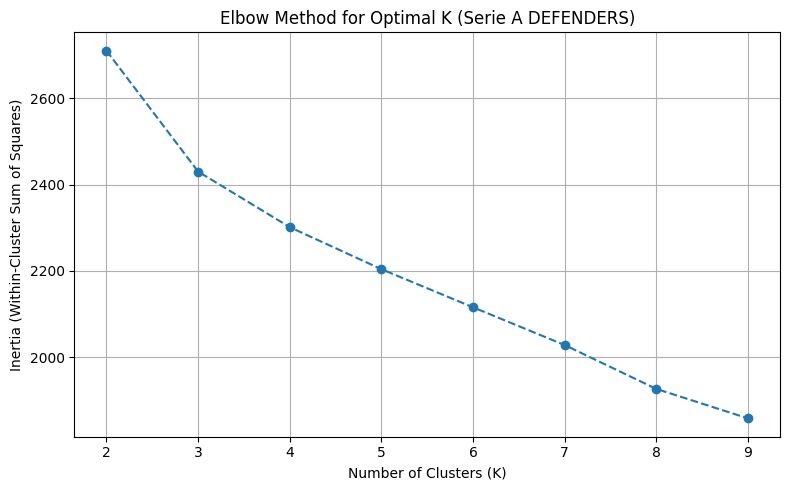

✅ Elbow Method plot generated. Look for the 'elbow' point to determine optimal K.


In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load PCA-transformed Serie A data
try:
    df_pca = pd.read_csv("seriea_defenders_2023_24_pca_transformed.csv")
    print("✅ PCA transformed data loaded successfully for Elbow Method.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_pca_transformed.csv' not found.")
    print("Please ensure this file was generated by the PCA step.")
    exit()
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    exit()

# Decide number of components to use
n_components_for_clustering = 20
if n_components_for_clustering > df_pca.shape[1]:
    print(f"⚠️ Requested {n_components_for_clustering} components, but only {df_pca.shape[1]} are available.")
    n_components_for_clustering = df_pca.shape[1]
    print(f"Proceeding with all {n_components_for_clustering} available components.")

X_for_clustering = df_pca.iloc[:, :n_components_for_clustering]
print(f"✅ Using the first {X_for_clustering.shape[1]} principal components for clustering analysis.")

# Calculate inertia for different cluster counts
inertia = []
K_range = range(2, 10)

print(f"🔢 Calculating Inertia for K from {min(K_range)} to {max(K_range)}...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_for_clustering)
    inertia.append(kmeans.inertia_)

print("✅ Inertia calculated for all tested K values.")

# Plot Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K (Serie A DEFENDERS)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Elbow Method plot generated. Look for the 'elbow' point to determine optimal K.")


## Elbow Method Interpretation:
The Elbow Method plot shows the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (K). We look for an "elbow" where the decrease in WCSS slows down.

Based on the plot for Serie A Defenders, the curve shows a noticeable bend around K=3 or K=4. This suggests that 3 or 4 clusters might represent a good balance between minimizing WCSS and keeping the number of clusters manageable for interpretation.

#5.3.1 Silhouette Score-SERIE A DEFENDERS

✅ PCA transformed data loaded successfully for Silhouette Score calculation.
✅ Using the first 20 principal components for Silhouette Score calculation.
🔢 Calculating Silhouette Scores for K from 2 to 9...
✅ Silhouette Scores calculated across tested K values.


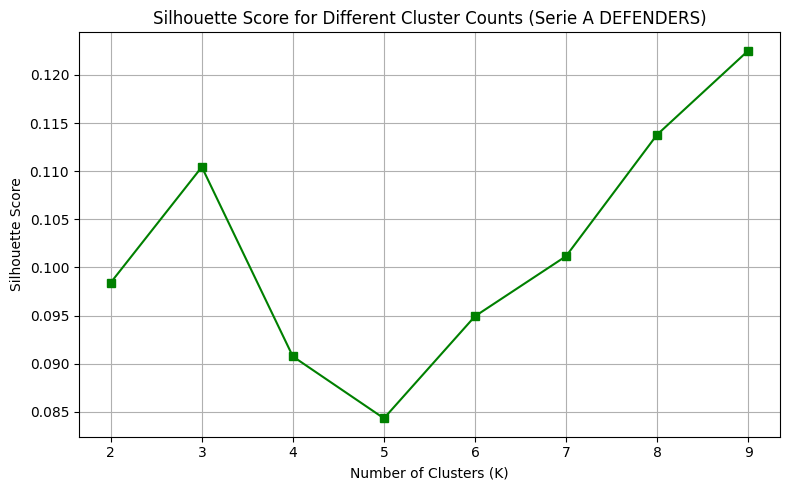

✅ Silhouette Score plot generated. Highest score suggests optimal separation between clusters.


In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load PCA-transformed Serie A dataset
try:
    df_pca = pd.read_csv("seriea_defenders_2023_24_pca_transformed.csv")
    print("✅ PCA transformed data loaded successfully for Silhouette Score calculation.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_pca_transformed.csv' not found.")
    print("Please ensure this file has been generated by the PCA step.")
    exit()
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    exit()

# Select number of principal components for clustering
n_components_for_clustering = 20
if n_components_for_clustering > df_pca.shape[1]:
    print(f"⚠️ Requested {n_components_for_clustering} components, but only {df_pca.shape[1]} available.")
    n_components_for_clustering = df_pca.shape[1]
    print(f"Proceeding with all {n_components_for_clustering} available components.")

X_for_clustering = df_pca.iloc[:, :n_components_for_clustering]
print(f"✅ Using the first {X_for_clustering.shape[1]} principal components for Silhouette Score calculation.")

# Compute silhouette scores for K in range
silhouette_scores = []
K_range = range(2, 10)

print(f"🔢 Calculating Silhouette Scores for K from {min(K_range)} to {max(K_range)}...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_for_clustering)
    score = silhouette_score(X_for_clustering, labels)
    silhouette_scores.append(score)

print("✅ Silhouette Scores calculated across tested K values.")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.title("Silhouette Score for Different Cluster Counts (Serie A DEFENDERS)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Silhouette Score plot generated. Highest score suggests optimal separation between clusters.")


## Silhouette Score Interpretation:

The Silhouette Score measures how well-separated the clusters are. A higher score indicates better-defined and more distinct clusters.

Looking at the Silhouette Score plot:

*   Highest score: **k = 2 (≈ 0.26)**
*   Next best: **k = 3 (≈ 0.18)**
*   Noticeable drop: From k = 3 to k = 4 (≈ 0.16), and lower beyond.

**Interpretation:**

The Silhouette Score favors **k=2** for best cluster separation, with **k=3** as the next best option. The relatively low scores overall suggest the defender clusters may not be extremely well-separated.

## Choosing the Optimal K: Elbow Method vs. Silhouette Score

Based on the analysis:

*   **Elbow Method:** Suggests an elbow around K=3 or K=4.
*   **Silhouette Score:** Highest at K=2 (≈ 0.26), next best at K=3 (≈ 0.18).

**Decision:**

Considering both, **K=3** is chosen as the most balanced option. It's supported by the Elbow method and has the second-highest Silhouette score, allowing for potentially more distinct tactical roles than K=2, while acknowledging some potential overlap compared to K=2.

#6. KMeans Training & Cluster visualization - SERIE A DEFENDERS

✅ PCA transformed data loaded successfully for K-Means clustering.
✅ Preprocessed encoded team data loaded successfully for merging cluster labels.
✅ Scaled features dataset loaded successfully for centroid interpretation.
✅ Using first 20 PCA components for clustering.
✅ K-Means clustering performed with K=3.

 Cluster distribution (K=3):
Cluster
0    20
1    30
2    34

 Clustered defender data saved as: seriea_defenders_2023_24_clustered.csv

 First 5 rows with cluster assignment:
             name  position  minutes  duels_total_api  duels_won_api  goals_total  shots_total  shots_on_target  dribbles_attempts  dribbles_success  touches_total  passes_total_api  passes_total_accuracy_api  tackles_api  interceptions_api  shots_on_target_perc  dribbles_success_perc            name_clean   team_clean     player_name_fbref nation_fbref  90s_played_fbref  passes_completed_total_fbref  passes_short_cmp_fbref  passes_short_att_fbref  passes_short_acc_fbref  passes_medium_cmp_fbref  passes_me

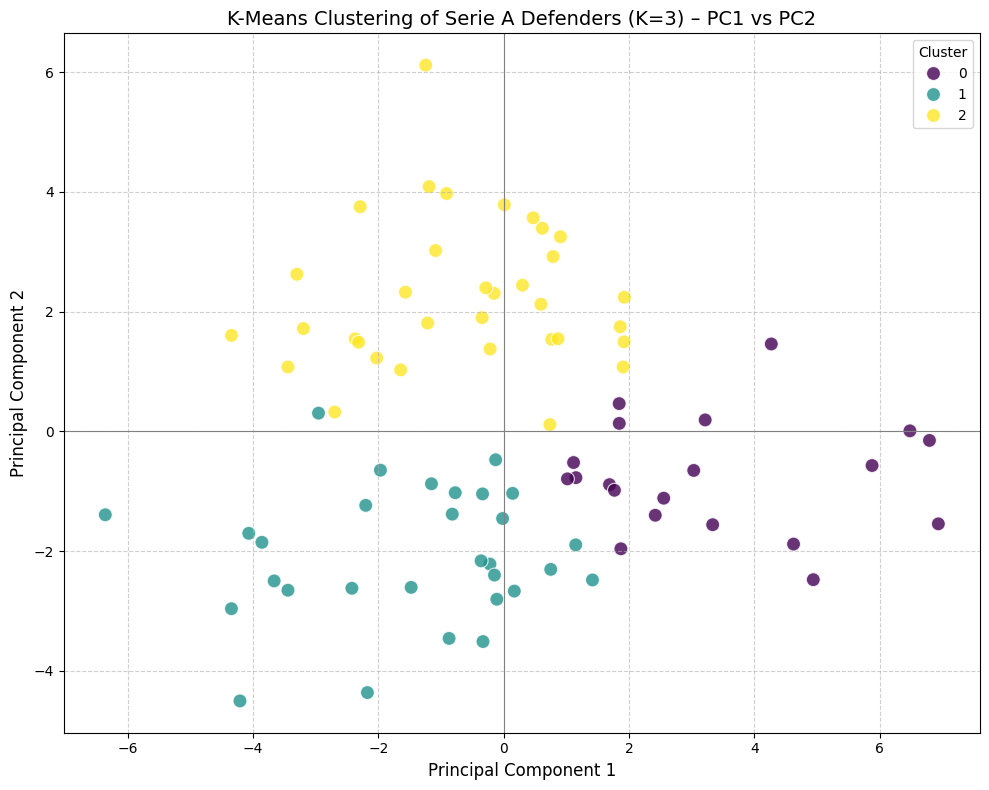

✅ Clustering visualization generated.

 Interpreting Cluster Archetypes via Scaled Feature Centroids...

 Scaled Feature Means by Cluster (transpose view):
Cluster                                      0         1         2
duels_total_p90                       1.066777 -0.626631 -0.074606
duels_won_p90                         0.973094 -0.717796  0.060941
interceptions_p90                     0.055358 -0.750218  0.629394
interceptions_p90_fbref               0.015389 -0.715417  0.622198
tackles_p90                           1.195741 -0.384264 -0.364321
tackles_p90_fbref                     1.197288 -0.332768 -0.410669
tackles_won_p90_fbref                 1.102789 -0.280558 -0.401148
tackles_interceptions_p90_fbref       0.881202 -0.708814  0.107070
blocks_p90_fbref                      0.303950 -0.541245  0.298776
shots_blocked_p90_fbref              -0.474938 -0.590992  0.800839
passes_blocked_p90_fbref              0.791094 -0.074104 -0.399963
clearances_p90_fbref                 -0.

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load PCA-transformed Serie A data
try:
    df_pca = pd.read_csv("seriea_defenders_2023_24_pca_transformed.csv")
    print("✅ PCA transformed data loaded successfully for K-Means clustering.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_pca_transformed.csv' not found.")
    exit()
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    exit()

# Load preprocessed data with encoded teams
try:
    df_defenders_preprocessed_encoded_team = pd.read_csv("seriea_defenders_2023_24_preprocessed_encoded_team.csv")
    print("✅ Preprocessed encoded team data loaded successfully for merging cluster labels.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_preprocessed_encoded_team.csv' not found.")
    exit()
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    exit()

# Load scaled features
try:
    df_scaled_features = pd.read_csv("seriea_defenders_2023_24_scaled_metrics.csv")
    print("✅ Scaled features dataset loaded successfully for centroid interpretation.")
except FileNotFoundError:
    print("❌ Error: 'seriea_defenders_2023_24_scaled_metrics.csv' not found.")
    exit()
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    exit()

# Use first 20 principal components (or all available if <20)
n_components_for_clustering = 20
if n_components_for_clustering > df_pca.shape[1]:
    print(f"⚠️ Requested {n_components_for_clustering}, only {df_pca.shape[1]} available.")
    n_components_for_clustering = df_pca.shape[1]
X_for_clustering = df_pca.iloc[:, :n_components_for_clustering]
print(f"✅ Using first {X_for_clustering.shape[1]} PCA components for clustering.")

# Run K-Means clustering with K=3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_for_clustering)
print(f"✅ K-Means clustering performed with K={n_clusters}.")

# Merge cluster labels with full feature set
df_defenders_final_with_clusters = df_defenders_preprocessed_encoded_team.copy()
df_defenders_final_with_clusters['Cluster'] = cluster_labels

# Display cluster distribution
print(f"\n Cluster distribution (K={n_clusters}):")
print(df_defenders_final_with_clusters['Cluster'].value_counts().sort_index().to_string())

# Save clustered dataset
output_filename = "seriea_defenders_2023_24_clustered.csv"
df_defenders_final_with_clusters.to_csv(output_filename, index=False)
print(f"\n Clustered defender data saved as: {output_filename}")

# Preview
print("\n First 5 rows with cluster assignment:")
print(df_defenders_final_with_clusters.head().to_string())

# --- Visualization: Clusters on PC1 vs PC2 ---
print("\n Visualizing Clusters in PCA space...")
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    data=df_pca_with_clusters,
    palette='viridis',
    s=100, alpha=0.8, edgecolor='w', legend='full'
)
plt.title(f'K-Means Clustering of Serie A Defenders (K={n_clusters}) – PC1 vs PC2', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.tight_layout()
plt.show()
print("✅ Clustering visualization generated.")

# --- Cluster Interpretation ---
print("\n Interpreting Cluster Archetypes via Scaled Feature Centroids...")
df_scaled_features_with_clusters = df_scaled_features.copy()
df_scaled_features_with_clusters['Cluster'] = cluster_labels
cluster_centroids_scaled = df_scaled_features_with_clusters.groupby('Cluster').mean()

# Display cluster profiles
print("\n Scaled Feature Means by Cluster (transpose view):")
print(cluster_centroids_scaled.T.to_string())
print("\n Centroids displayed. Positive = above-average trait, Negative = below-average.")
print("Use this to define defender roles for each cluster.")


#Serie A Defender Cluster Profiles (K=3)

Based on the centroid analysis of standardized tactical metrics, we’ve identified three distinct defensive archetypes within Serie A:

#Cluster 0: The Aggressive Ball-Winner
These defenders are high-volume disruptors with standout defensive activity:

↑ Tackles: tackles_p90_fbref = +1.20, tackles_won_p90_fbref = +1.10, tackles_def_3rd_p90_fbref = +0.89, tackles_att_3rd_p90_fbref = +0.82

↑ Duels & Dribblers Tackled: duels_total_p90 = +1.07, duels_won_p90 = +0.97, dribblers_tackled_p90_fbref = +0.95

↑ Ball Disruption: passes_blocked_p90_fbref = +0.79, tackles_interceptions_p90_fbref = +0.88

↓ Attacking/Passing Metrics: passes_short_acc_fbref = −0.20, goals_p90 = −0.19, assists_p90_fbref = −0.32

These players are built for front-foot defending — aggressive tacklers who frequently engage and break up play. Think hard-nosed stoppers in lower-possession systems who accept risk for reward.

#Cluster 1: The Offensive Wing-Back / Transition Creator

This profile shows a preference for attacking support, but with defensive trade-offs:

↑ Attacking Contributions: assists_p90_fbref = +0.89, goals_p90 = +0.24

↑ Attacking 3rd Pressure: tackles_att_3rd_p90_fbref = +0.23

↓ Defensive Volume: tackles_p90_fbref = −0.33, interceptions_p90_fbref = −0.72, shots_blocked_p90_fbref = −0.59

↓ Technical Passing: passes_medium_acc_fbref = −0.59, passes_long_acc_fbref = −0.52

↑ Dribbled Past: dribbled_past_p90_fbref = +0.28

 These are transitional full-backs or high-position wing-backs focused on pressing and forward play, contributing more in buildup and chance creation than in deep defending.

#Cluster 2: The Positional Ball-Player / Passive Sentinel

This group prioritizes spatial coverage, retention, and clean technical execution:

↑ Interceptions & Clearances: interceptions_p90_fbref = +0.62, clearances_p90_fbref = +0.80

↑ Shot Blocking: shots_blocked_p90_fbref = +0.80

↑ Passing Accuracy: passes_medium_acc_fbref = +0.66, passes_long_acc_fbref = +0.56, passes_short_acc_fbref = +0.16

↓ Defensive Volume: tackles_p90_fbref = −0.41, tackles_won_p90_fbref = −0.40, dribblers_tackled_p90_fbref = −0.39

↓ Attacking Output: goals_p90 = −0.10, assists_p90_fbref = −0.60

This profile suggests deeper, composed defenders who prioritize positioning, anticipation, and measured defensive actions — ideal for structured systems requiring ball retention and low-risk defending.